# About Dataset
## Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service
Content

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise  
Complain - 1 if customer complained in the last 2 years  
DtCustomer - date of customer’s enrolment with the company  
Education - customer’s level of education  
Marital - customer’s marital status  
Kidhome - number of small children in customer’s household  
Teenhome - number of teenagers in customer’s household  
Income - customer’s yearly household income  
MntFishProducts - amount spent on fish products in the last 2 years  
MntMeatProducts - amount spent on meat products in the last 2 years  
MntFruits - amount spent on fruits products in the last 2 years  
MntSweetProducts - amount spent on sweet products in the last 2 years  
MntWines - amount spent on wine products in the last 2 years  
MntGoldProds - amount spent on gold products in the last 2 years  
NumDealsPurchases - number of purchases made with discount  
NumCatalogPurchases - number of purchases made using catalogue  
NumStorePurchases - number of purchases made directly in stores  
NumWebPurchases - number of purchases made through company’s web site  
NumWebVisitsMonth - number of visits to company’s web site in the last month  
Recency - number of days since the last purchase

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# memanggil dataset 'marketing_campaign'

df=pd.read_csv("marketing_campaign.csv", sep=";")

## Descriptive Statistics

In [ ]:
# memanggil 5 data teratas dari dataset

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
num=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
     'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases',
     'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue']
cat=['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain',
     'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
     'AcceptedCmp5', 'Response']
nom=['Education', 'Marital_Status']

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df[num].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [ ]:
#df[cat]=df[cat].astype('object')
#df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
#df.info()

In [ ]:
df[cat].describe()

,Kidhome,Teenhome,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,0.009375,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,0.538398,0.544538,0.096391,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[nom].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


**A. Kesesuaian tipe data**  
> Kolom `Dt_Customer` berisi informasi tentang tanggal customer melakukan pendaftaran pada perusahaan tersebut. Namun pada dataset kolom tersebut memiliki tipe data *object*, seharusnya tipe data kolom tersebut ialah *date*.  

**B. Kolom yang memiliki nilai kosong**
>Ada atribut yang memiliki nilai kosong, yaitu income. Pada atribut lainnya tidak terdapat nilai kosong.

**C. Nilai summary yang agak aneh**
> * Kolom `Z_CostContact` memiliki nilai summary statistik yang sama baik nilai *min, mean, quartil, dan max* yaitu 3, sedangkan nilai std=0. Ini menunjukkan bahwa kolom tersebut memiliki nilai yang sama untuk setiap pengamatan.

> * Kolom `Z_Revenue` memiliki nilai summary statistik yang sama baik nilai *min, mean, quartil, dan max* yaitu 11, sedangkan nilai std=0. Ini menunjukkan bahwa kolom tersebut memiliki nilai yang sama untuk setiap pengamatan.

Feature `Z_CostContact` dan `Z_Revenue` tidak akan digunakan untuk modelling.

> Pada feature `Year_Birth` terdapat informasi tahun lahir consumer yang aneh, yaitu **1893** yang mana jika dihitung usianya bisa mencapai lebih dari 100 tahun.

> Selain itu pada feature `Income` nilai maximumnya yaitu **666666** terlalu dari dari nilai ukuran pemusatan data lainnya.

Kedua nilai aneh tersebut akan dikeluarkan dari pengamatan.

## Univariate Analysis

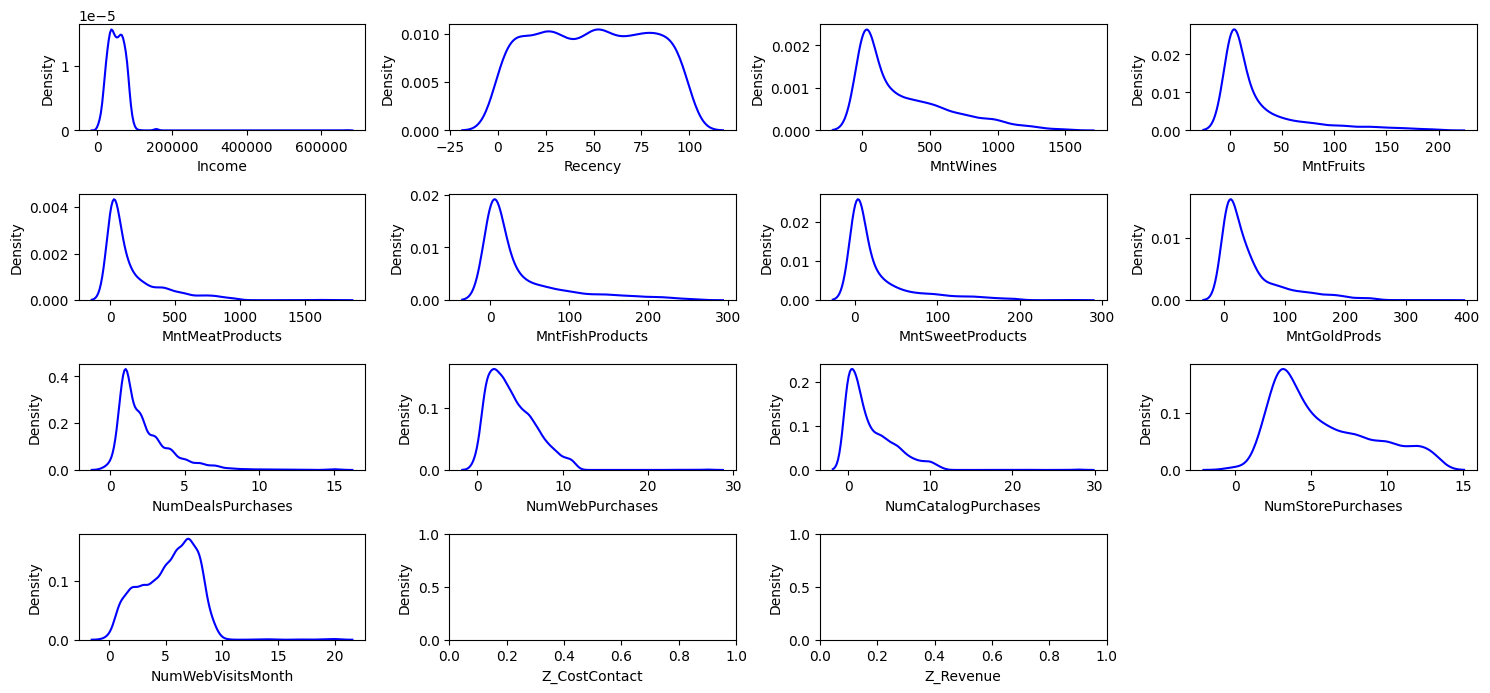

In [ ]:
plt.figure(figsize=(15,10))
features = num
for i in range (0, len(features)):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

* Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth` berdistribusi *right-skewed*. Ini menunjukkan bahwa pada kolom-kolom tersebut nilai mean > median.  
* Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Complain`,`Z_Revenue`, `Response` membentuk distribusi bimodal dengan puncak pada nilai 0 dan 1.
* Kolom `Kidhome` dan `Teenhome` membentuk distribusi multimodal, membentuk puncak pada nilai 0, 1, dan 2.

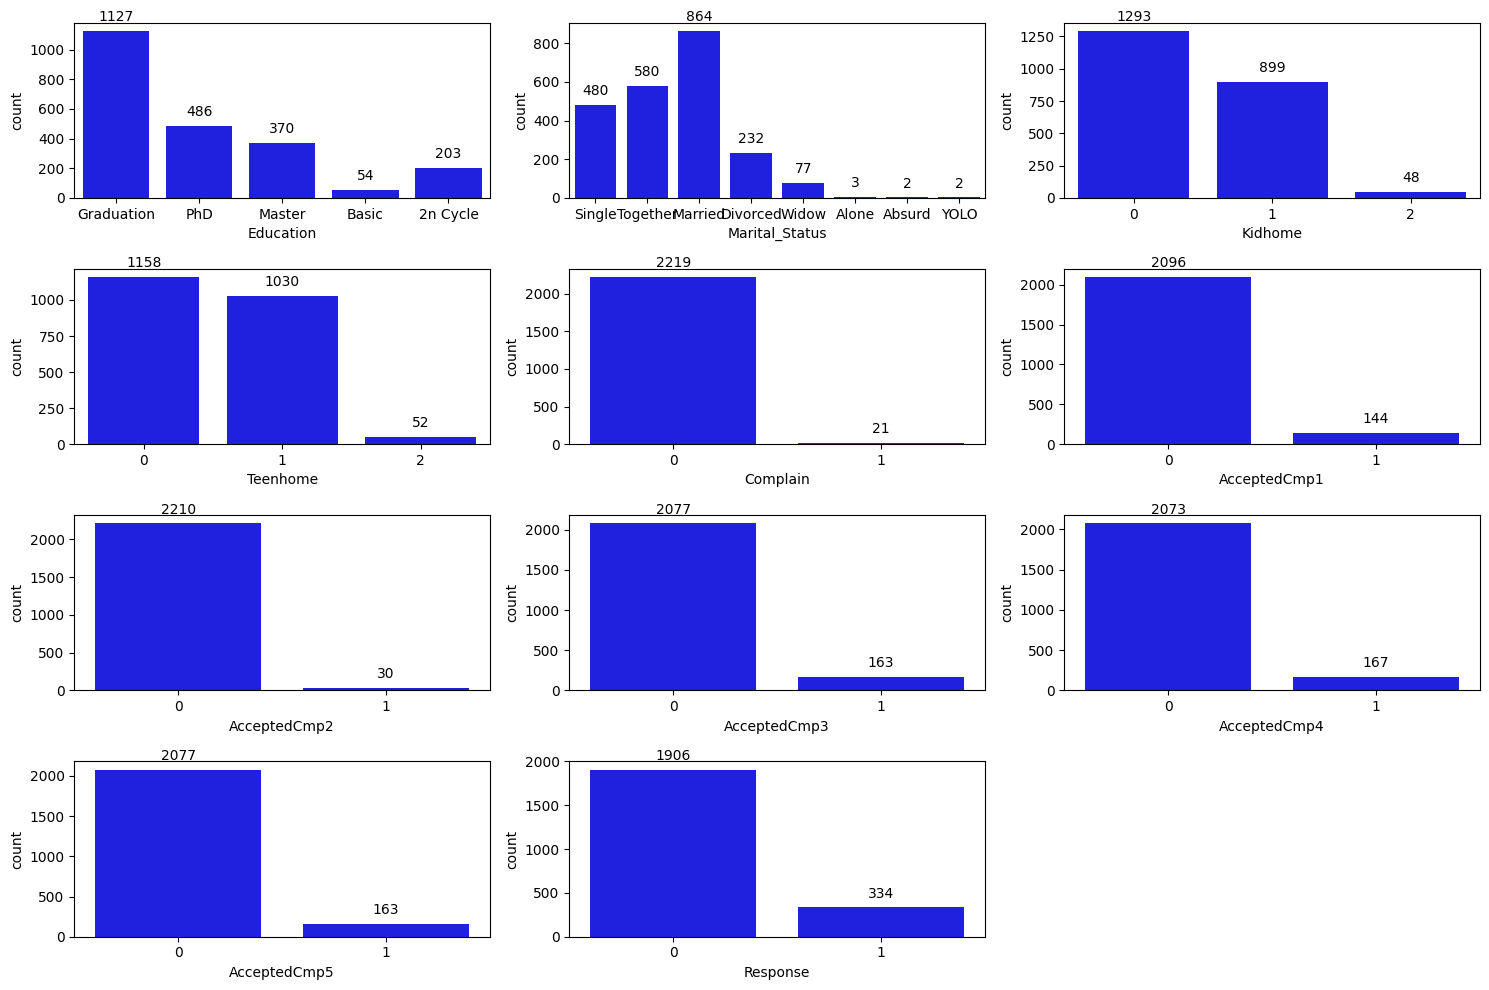

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
features = cat

for i in range(0, len(features)):
    plt.subplot(4, 3, i + 1)
    ax = sns.countplot(x=df[features[i]], color='blue')

    # Add label annotations
    for p in ax.patches:
        height = int(p.get_height())  # Convert height to integer
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

* Terdapat 5 kategori pada kolom `Education`, dengan kategori terbanyak 'Graduation' dan kategori paling sedikit 'Basic'.
* Terdapat 8 kategori pada kolom `Marital_Status`. Terdapat terlalu byk kategori dengan jumlah yang terlalu sedikit, oleh karena itu perlu dilakukan pengategorian ulang.

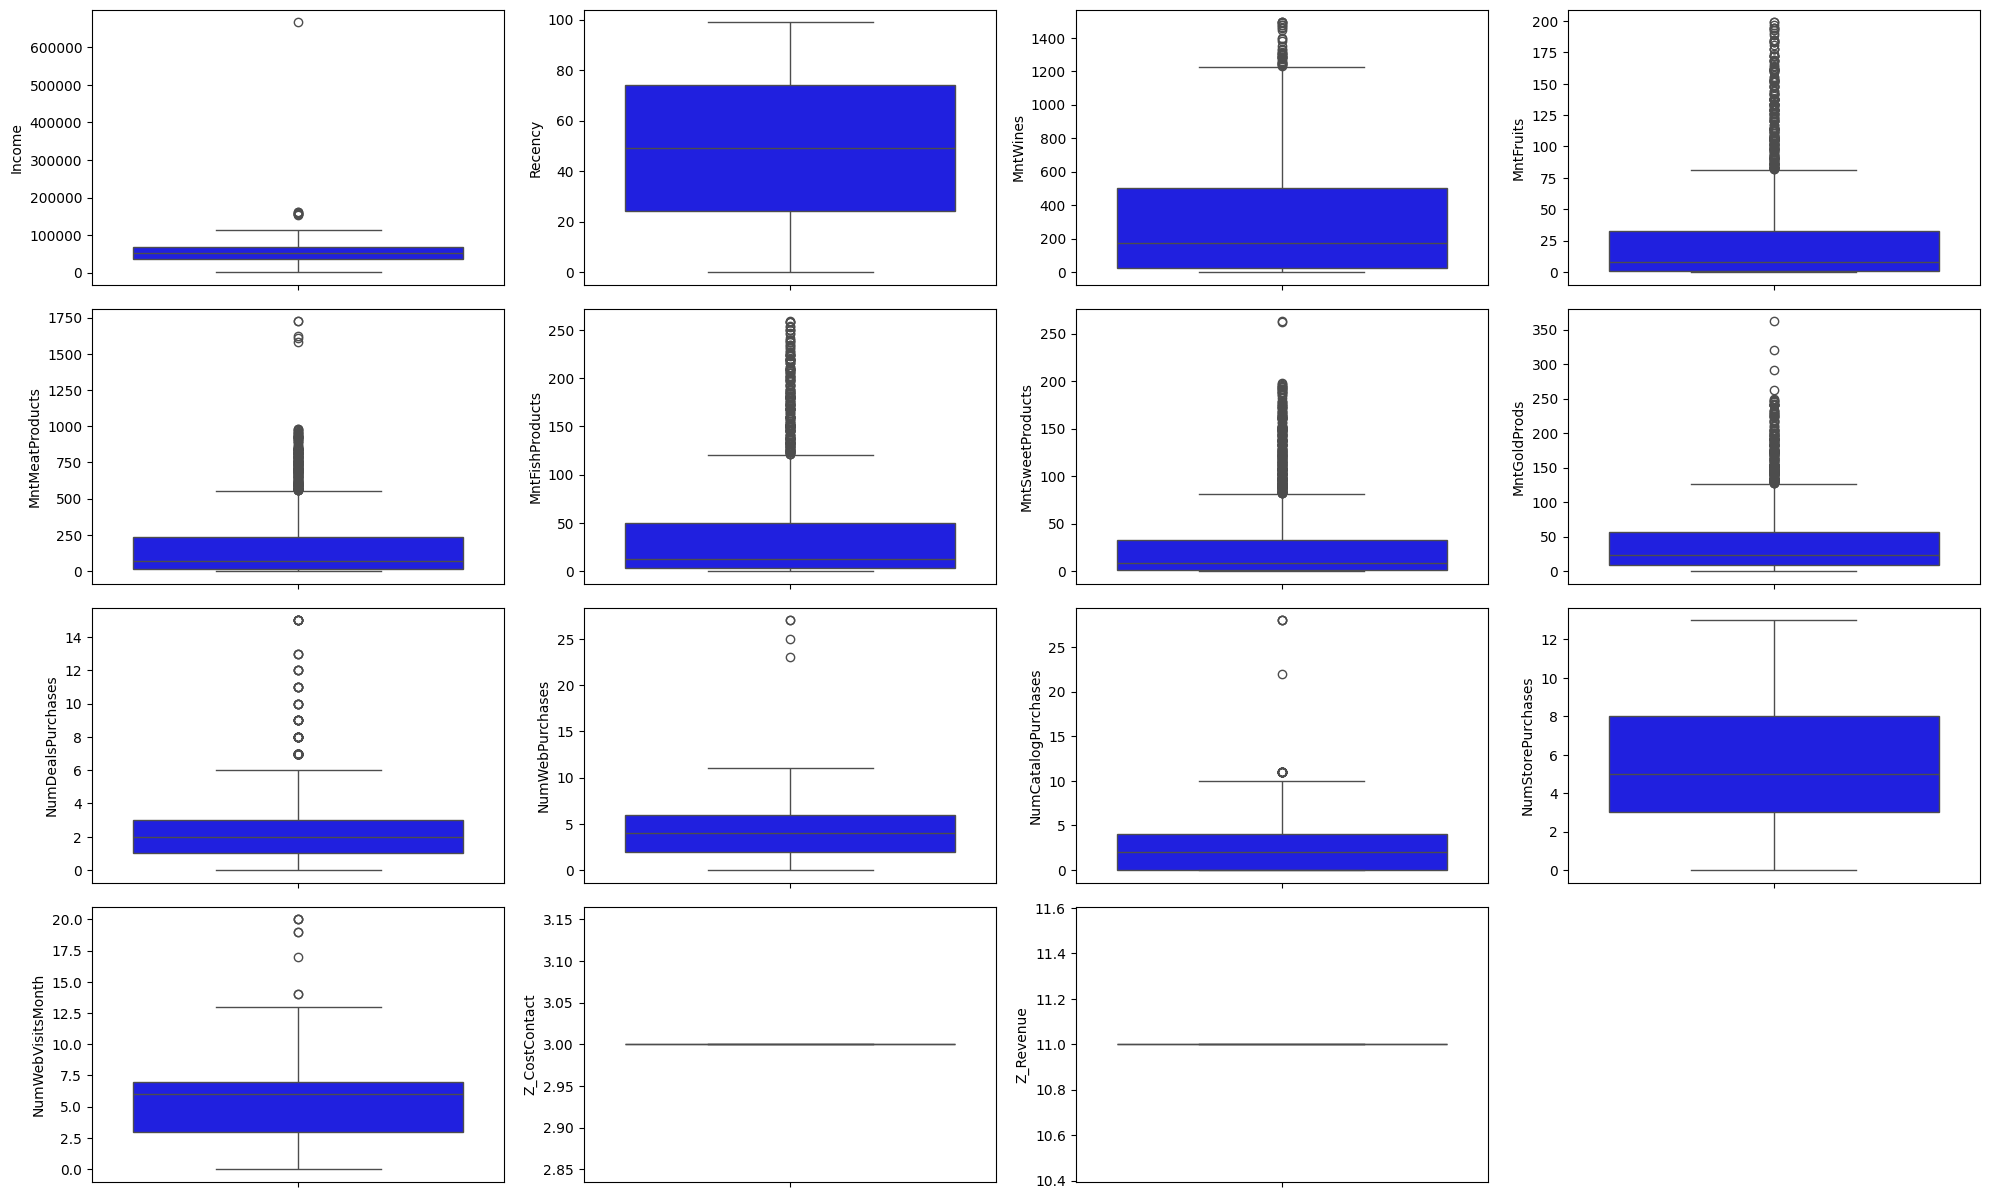

In [ ]:
plt.figure(figsize=(20,18))
features = num
for i in range (0, len(features)):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

> Sebagian besar feature memiliki nilai outlier atas. Feature-feature tersebut adalah sebagai berikut :
* Income  
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetsProducts
* MntGoldProds
* NumDealsPurchases
* NumWebPurchases
* NumCatalogPurchases
* NumWebVisitsMonth

> Feature yang tidak memiliki nilai outlier :    
* Recency
* NumStorePurchases

## Multivariate Analysis

<Axes: >

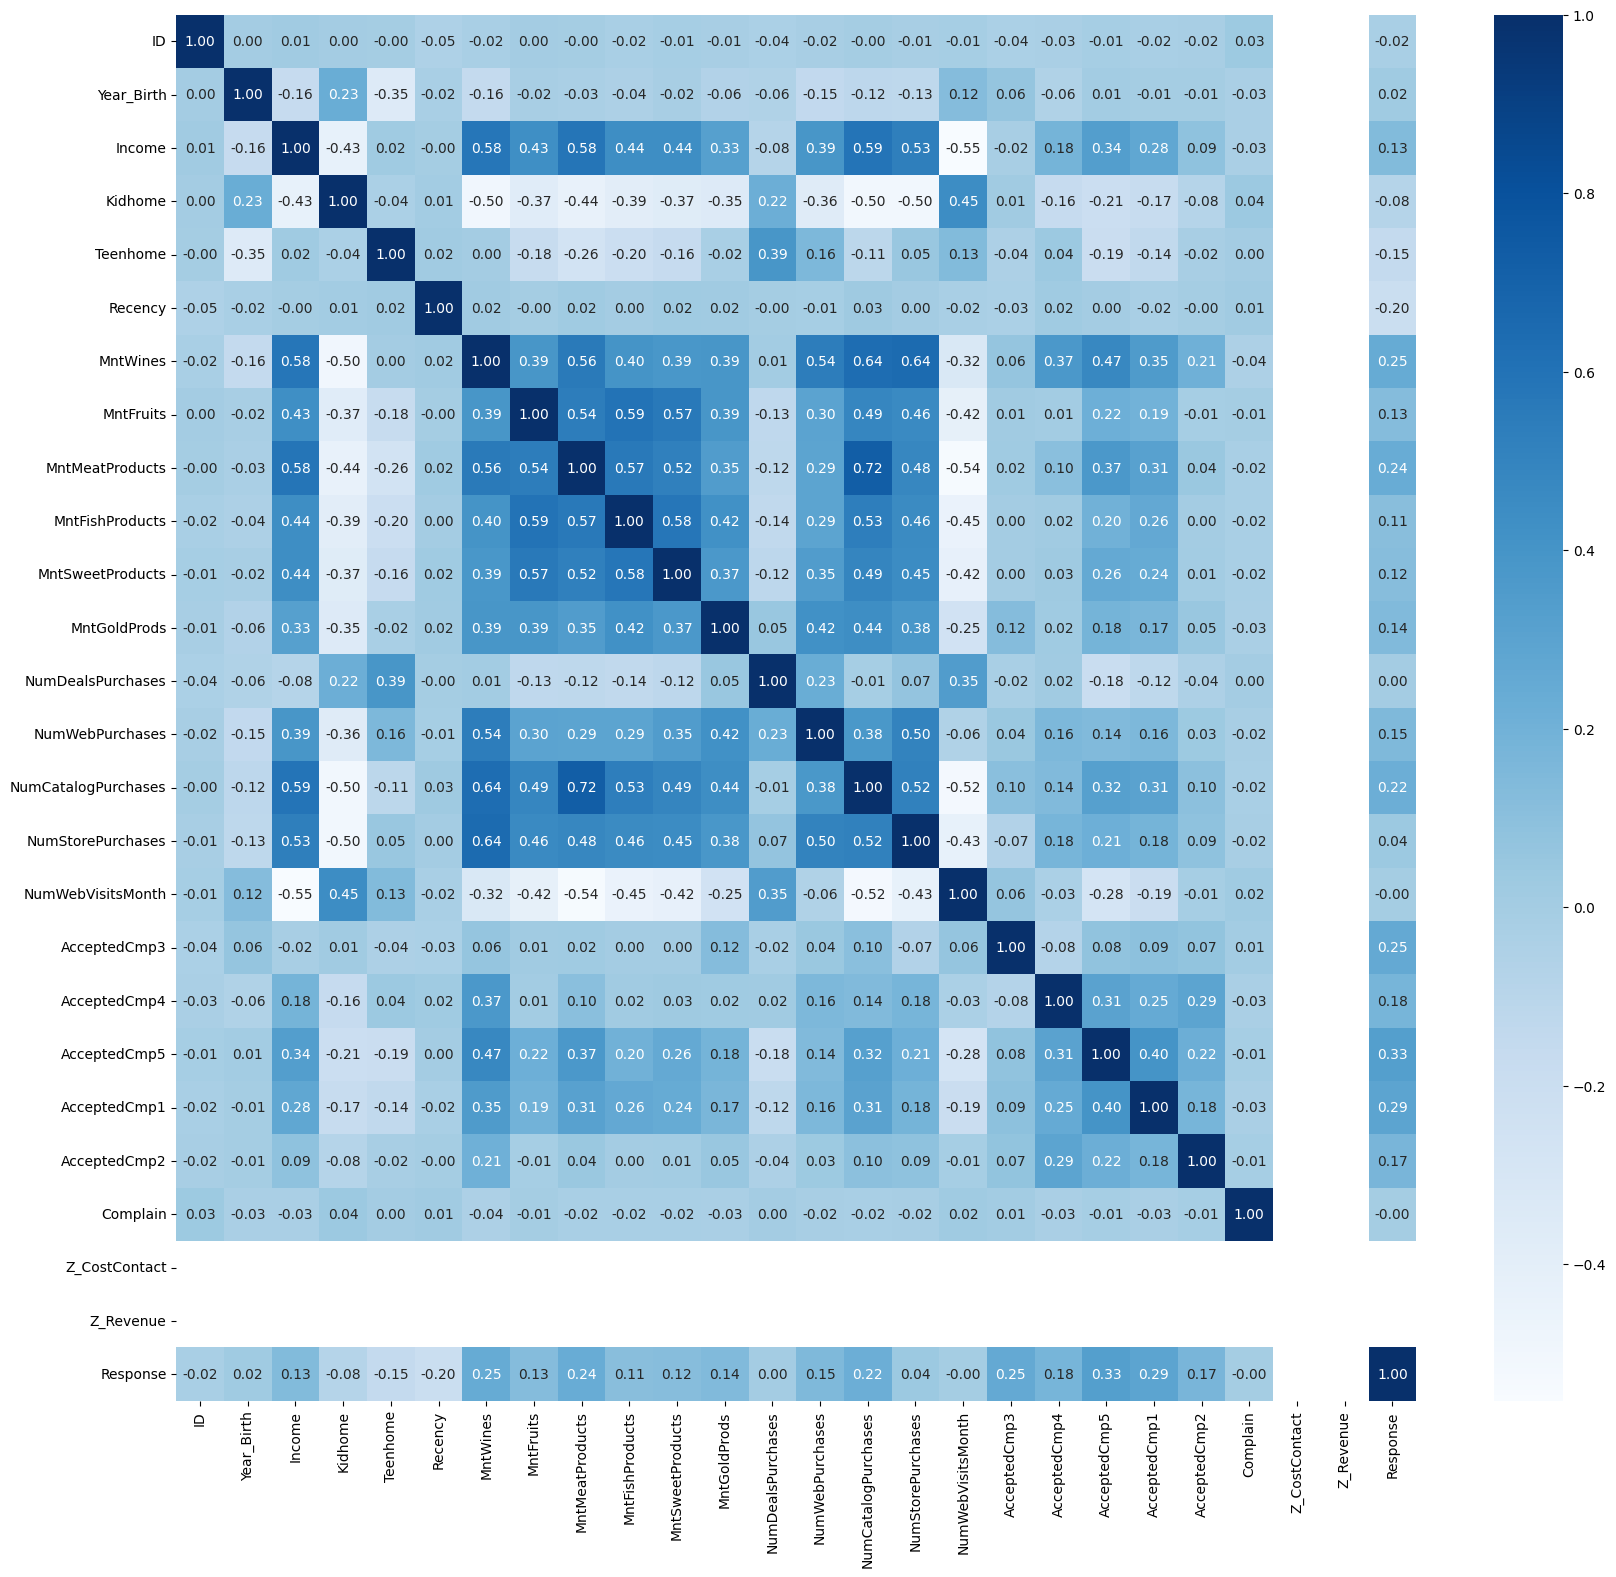

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Korelasi antara feature dengan label**
> * Terdapat korelasi yang lemah dan arahnya positif antara `Response` dengan `MntWines`, `MntFruits`,  `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan bahwa customer yang menerima penawaran pada campaign terakhir, membeli produk-produk tersebut.
> * Terdapat korelasi yang lemah dan arahnya positif antara `Response` dengan `NumWebPurchases`, `NumCatalogPurchases`.
> * Terdapat korelasi lemah dan positif antara `Response` dengan `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`,`AcceptedCmp4`, `AcceptedCmp5`. Customer yang menerima penawaran pada campaign terakhir juga menerima penawaran pada campaign-campaign sebelumnya.
> * Terdapat korelasi lemah dan negatif antara `Response` dengan `Teenhome`, semakin banyak jumlah anak yang dimiliki customer maka customer cenderung tidak nemerima penawaran pada campaign terakhir. Begitu pula hubungan antara `Response` dengan `Recency`. Semakin lama jarak pembelian terakhir customer maka customer cenderung tidak menerima penawaran pada campaign terakhir.

**Korelasi antar feature**
> * Terdapat korelasi yang cukup kuat dan arahnya positif antara `Income` dan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Korelasi ini menunjukkan bahwa semakin tinggi pendapatan customer maka semakin banyak jumlah uang yang ia keluarkan untuk membeli produk-produk tersebut.
> * Terdapat korelasi yang cukup kuat dan arahnya positif antara `Income` dan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Korelasi ini menunjukkan semakin tinggi pendapatan customer maka semakin sering customer berbelanja dengan metode-metode tersebut. Namun, korelasi  antara `Income` dan `NumWebVisitsMonth` bernilai negatif, yang berarti semakin tinggi pendapatan customer maka semakin jarang customer tersebut mengunjungi website perusahaan.
> * Terdapat korelasi yang cukup dan arahnya negatif antara `Kidhome` dan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan bahwa semakin banyak jumlah anak yang dimiliki oleh customer maka jumlah uang yang dikeluarkan oleh customer untuk membeli barang-barang tersebut semakin sedikit.
> * Terdapat korelasi dan arahnya negatif antara `Kidhome` dengan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Korelasi ini menunjukkan semakin banyak jumlah anak yang dimiliki oleh customer maka semakin jarang customer berbelanja dengan metode-metode tersebut. Namun, korelasi  antara `Kidhome` dan `NumWebVisitsMonth` bernilai positif, yang berarti semakin banyak jumlah anak customer maka semakin sering customer tersebut mengunjungi website perusahaan.
> * Terdapat korelasi yang cukup kuat dan positif antara `MntWines`, dengan `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan semakin banyak uang yg dikeluarkan customer untuk membeli wine maka semakin banyak pula uang yang dikeluarkan customer untuk membeli barang-barang lainnya. Pelanggan yang mengeluarkan uang untuk membeli wine juga cenderung akan menerima penawaran campaign `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp4`, `AcceptedCmp5`.
>* Terdapat korelasi yang  positif antara produk-produk yang dijual (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`) dengan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Ini menunjukkan bahwa semakin banyak uang yang dikeluarkan customer untuk membeli produk-produk tersebut, semakin sering juga customer membeli melalui metode pembelian tersebut. Antara `MntMeatProducts` dengan `NumCatalogPurchases` terdapat korelasi yang kuat, yang berarti semakin sering melakukan pembelian menggunakan catalog maka semakin banyak customer membeli daging.
> * Pembelian dengan diskon dilakukan melalui website. Ini ditunjukkan adanya korelasi antara `NumDealsPurchase` dengan `NumWebPurchases` dan `NumWebVisitsMonth`, namun korelasi antar keduanya lemah.

In [ ]:
sns.pairplot(df[num], diag_kind='reg')

## Business Insight

In [ ]:
df_bi=df.copy()

#### Number of Customers Response The Marketing Campaign

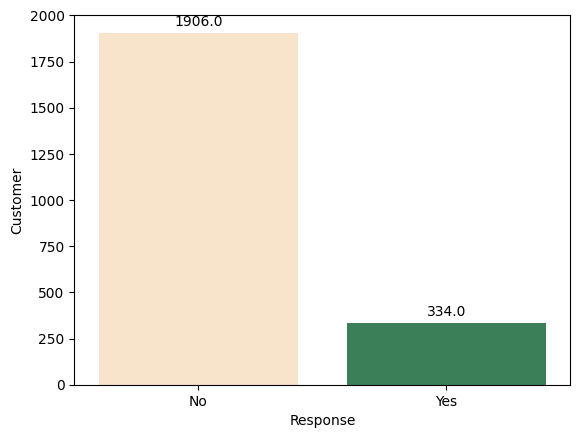

In [ ]:
ax=sns.countplot(x='Response', data=df_bi, palette=['bisque', 'seagreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(['No', 'Yes'])
plt.xlabel('Response')
plt.ylabel('Customer')
plt.show()

Dari 2240 customer yang diberikan campagin, hanya 334 responden yang merespon campaign yang diberikan.

#### Product Spent

Text(0.5, 1.0, 'Mean of Total Spent by Response')

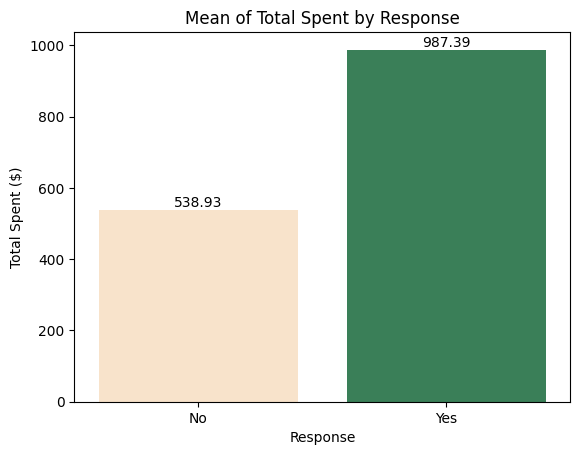

In [ ]:
df_bi['Total']=df_bi['MntWines']+df_bi['MntFruits']+df_bi['MntMeatProducts']+df_bi['MntFishProducts']+df_bi['MntSweetProducts']+df_bi['MntGoldProds']

df_total_spent=df_bi.groupby('Response')['Total'].mean().round(2).reset_index()
ax=sns.barplot(x='Response', y='Total', data=df_total_spent, palette=['bisque', 'seagreen'])
ax.set_xticklabels(['No', 'Yes'])

for i, value in enumerate(df_total_spent['Total']):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.xlabel('Response')
plt.ylabel('Total Spent ($)')
plt.title('Mean of Total Spent by Response')

Rata-rata total pengeluaran customer yang merespons campaign lebih tinggi dibanding customer yang tidak merespons campaign. Rata-rata total pengeluaran seluruh tipe produk dari customer yang merespons campaign adalah `$987.39`, sedangkan rata-rata total pengeluaran customer yang tidak merespons campagin sebesar `$539.93`.

##### Uji beda rata-rata dua kelompok dengan mann whitney

In [ ]:
from scipy.stats import mannwhitneyu

not_respond=df_bi[df_bi['Response']==0]
respond=df_bi[df_bi['Response']==1]

statistic, p_value = mannwhitneyu(respond['Total'], not_respond['Total'], alternative='greater')

print(f'Statistic : {statistic}')
print(f'P-value : {p_value}')

if p_value >=0.05:
  print('Tidak cukup bukti untuk menolak H0, tidak terdapat perbedaan rata-rata total pengeluaran customer yang merespon campaign dengan customer yang merespon campaign')
else:
  print('Cukup bukti untuk menolak H0, rata-rata total pengeluaran customer yang merespon campaign lebih besar daripada customer yang tidak merespon campaign')

Statistic : 441421.5
P-value : 7.20583486504016e-30
Cukup bukti untuk menolak H0, rata-rata total pengeluaran customer yang merespon campaign lebih besar daripada customer yang tidak merespon campaign


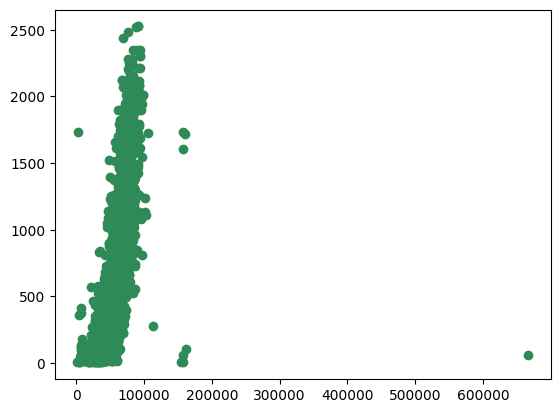

In [ ]:
plt.scatter(x='Income', y='Total', data=df_bi, color='seagreen')

#### Income-Total Spending

In [ ]:
# membuat feature baru untuk mengategorikan income customer

q1 = df_bi['Income'].quantile(0.25)
q3 = df_bi['Income'].quantile(0.75)
meann = df_bi['Income'].quantile(0.5)
maxx= df_bi['Income'].max()
minn=df_bi['Income'].min()
print(q1)
print(q3)
print(meann)
print(minn)
print(maxx)

35303.0
68522.0
51381.5
1730.0
666666.0


Text(0.5, 1.0, 'Customers Total Spent Distribution by Income Category')

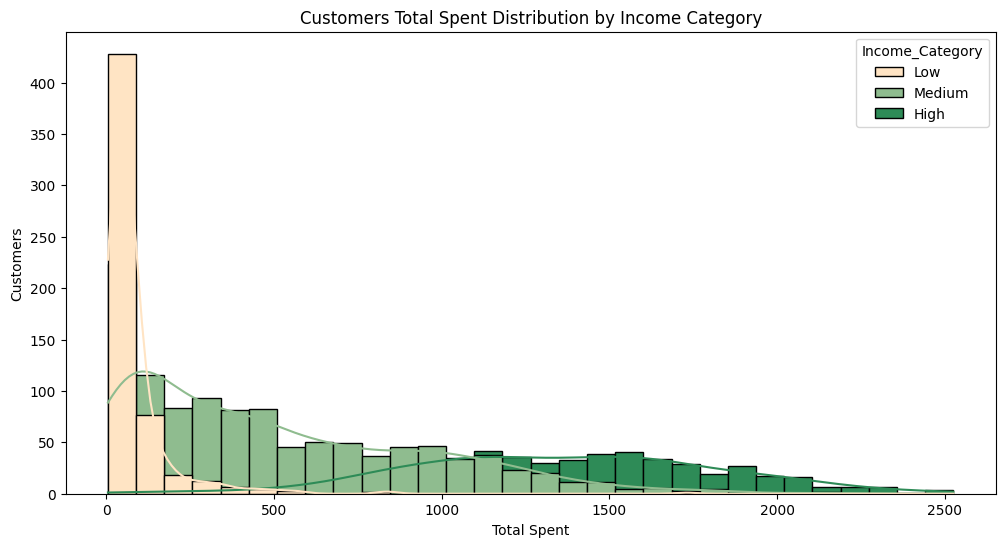

In [ ]:
labels = ['Low','Medium','High']
ranges=[1730,35284,68487,162397]
df_bi['Income_Category']=pd.cut(df_bi['Income'],bins=ranges,labels=labels)
plt.figure(figsize=(12,6))
sns.histplot(data=df_bi, kde=True, x='Total', hue=df_bi['Income_Category'], bins=30,
             alpha=1, palette=['bisque', 'darkseagreen', 'seagreen'])
plt.xlabel('Total Spent')
plt.ylabel('Customers')
plt.title('Customers Total Spent Distribution by Income Category')

Dari plot di atas dapat perlihat bahwa distribusi total spending dipengaruhi oleh income customer tersebut. Customer dengan kategori income yang lebih tinggi lebih memiliki total spending yang lebih tinggi pula.

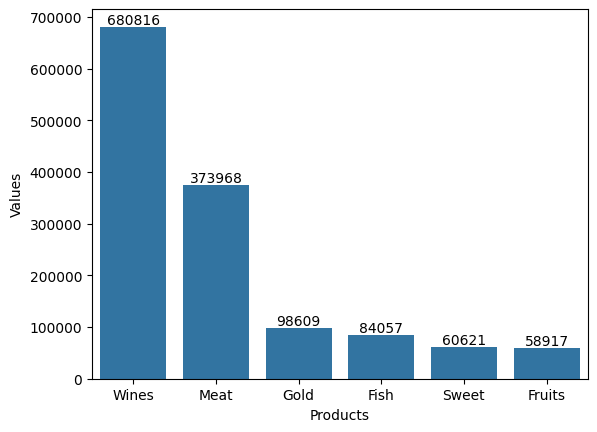

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# memilih feature product dan menjumlahkan masing-masing jenis product
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
values = [df_bi[col].sum() for col in df_bi.columns[9:15]]

# membuat data frame baru berisi spending berdasarkan product
data = {'Products': products, 'Values': values}
df_plot = pd.DataFrame(data)

# mengurutkan product dari jumlah spending terbesae
df_plot = df_plot.sort_values(by='Values', ascending=False)

# membuat barplot
ax = sns.barplot(x='Products', y='Values', data=df_plot)

# menambahkan label
for i, value in enumerate(df_plot['Values']):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

# memunculkan plot
plt.show()

Produk wine memiliki total penjualan yang paling tinggi mencapai `$680807`, yang kedua adalah meat dengan total penjualan `373950`, diurutan ketiga adalah gold sebesar `$98597`, keempat fish sebesar `$84049`, yang kelima adalah sweet sebesar `$60620`, dan fruit adalah product dengan total penjualan paling kecil yaitu sebesar `$58903`,.

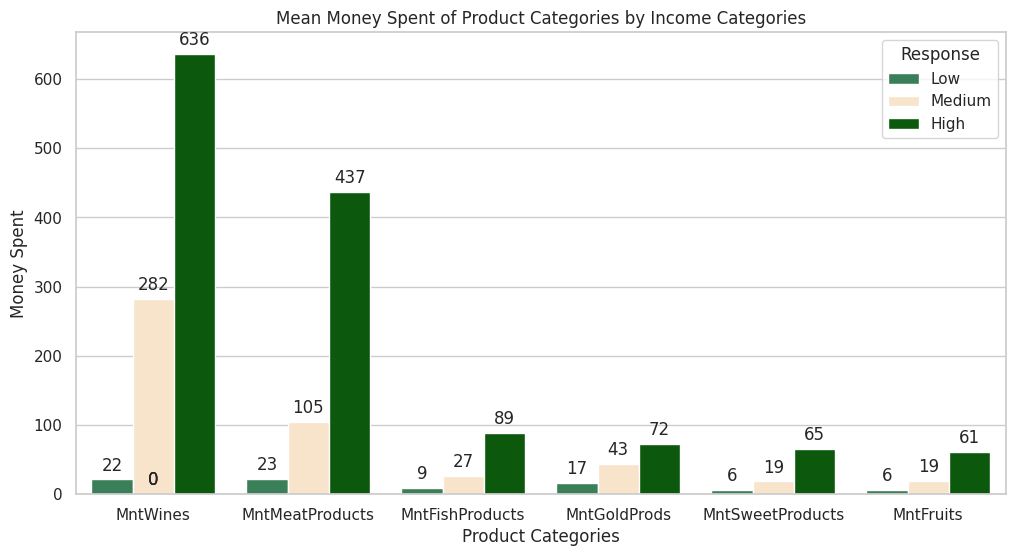

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_product_income=df_bi.groupby('Income_Category').agg({'MntWines': 'mean', 'MntFruits' :'mean', 'MntMeatProducts':'mean', 'MntFishProducts' :'mean',
                                       'MntSweetProducts': 'mean', 'MntGoldProds':'mean'}).reset_index()

# Use the melted DataFrame for plotting
df_product_income_melted = df_product_income.melt(id_vars='Income_Category', var_name='Product', value_name='Mean')
df_product_income_melted=df_product_income_melted.sort_values(by='Mean', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(x='Product', y='Mean', hue='Income_Category',
                 palette=['seagreen', 'bisque', 'darkgreen'], data=df_product_income_melted, alpha=1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Money Spent')
plt.title('Mean Money Spent of Product Categories by Income Categories')

# Show legend
plt.legend(title='Response', loc='upper right')

# Show the plot
plt.show()

In [ ]:
df_product_income_melted

,Income_Category,Product,Mean
2,High,MntWines,635.889693
8,High,MntMeatProducts,436.745027
1,Medium,MntWines,282.028881
7,Medium,MntMeatProducts,104.664260
11,High,MntFishProducts,88.880651
17,High,MntGoldProds,72.408680
14,High,MntSweetProducts,65.191682
5,High,MntFruits,60.878843
16,Medium,MntGoldProds,43.355596
10,Medium,MntFishProducts,26.574910


In [ ]:
#df_prod_income=df.groupby('Income_Category').agg({'MntWines': 'sum', 'MntFruits' :'sum', 'MntMeatProducts':'sum', 'MntFishProducts' :'sum',
 #                                      'MntSweetProducts': 'sum', 'MntGoldProds':'sum'}).reset_index()
#df_prod_income_melted=df_prod_income.melt(id_vars='Income_Category', var_name='Product', value_name='Total')
#df_prod_income_melted
#prod_income_pivot=df_prod_income_melted.pivot_table(index='Income_Category', columns='Product', values='Total').reset_index()
#prod_income_pivot
#prod_income_pivot=prod_income_pivot.sort_values(by='Total', ascending=False)

#ax = df_prod_income_melted.plot(kind='bar', x='Product', y='Total', hue='Income_Category', stacked=True)


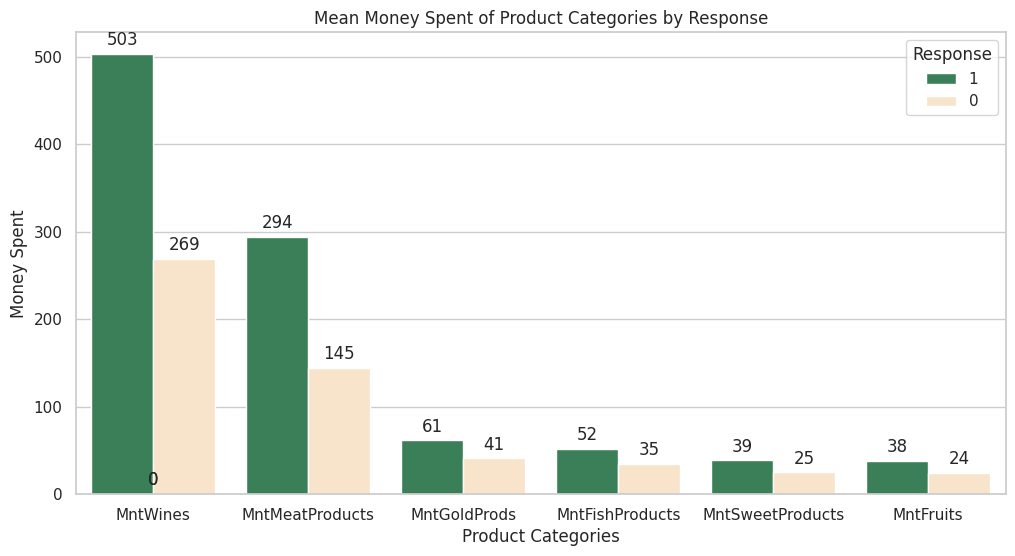

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_product=df_bi.groupby('Response').agg({'MntWines': 'mean', 'MntFruits' :'mean', 'MntMeatProducts':'mean', 'MntFishProducts' :'mean',
                                       'MntSweetProducts': 'mean', 'MntGoldProds':'mean'}).reset_index()

# Use the melted DataFrame for plotting
df_product_melted = df_product.melt(id_vars='Response', var_name='Product', value_name='Mean')
df_product_melted=df_product_melted.sort_values(by='Mean', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(x='Product', y='Mean', hue='Response', hue_order=[1,0],
                 palette=['seagreen', 'bisque'], data=df_product_melted, alpha=1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Money Spent')
plt.title('Mean Money Spent of Product Categories by Response')

# Show legend
plt.legend(title='Response', loc='upper right')

# Show the plot
plt.show()

**Rata-rata penjualan per product berdasarkan respon customer**

Dilihat dari rata-rata penjualan produk berdasarkan respon customer terhadap campaign diketahui bahwa rata-rata penjualan customer yang merespon campaign pada masing-masing jenis produk lebih tinggi dibandingkan customer yang tidak merespon campaign.

#### Age

In [ ]:
df_bi['Age']=2019-df_bi['Year_Birth']
q1 = df_bi['Age'].quantile(0.25)
q3 = df_bi['Age'].quantile(0.75)
meann = df_bi['Age'].quantile(0.5)
maxx= df_bi['Age'].max()
minn=df_bi['Age'].min()
print(q1)
print(q3)
print(meann)
print(minn)
print(maxx)

42.0
60.0
49.0
23
126


**Umur Pembeli**
> * Dari sini, dapat dilihat rata-rata konsumen berumur 53 tahun.
> * Usia pembeli di market dari yang termuda berumur 27 tahun dan yang paling tua berumur 130 tahun
> * Simpangan umur yang pertama dengan simpangan umur yang ketiga tidak terlalu jauh dengan rata rata sehingga data disini memiliki umur yang tidak terlalu menyimpang

<Axes: xlabel='Age_Category', ylabel='count'>

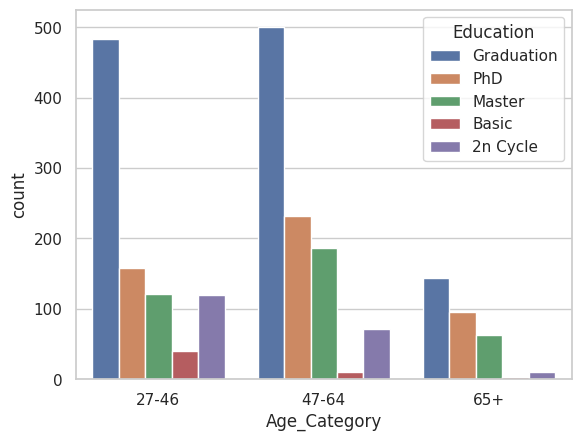

In [ ]:
labels = ['27-46','47-64','65+']
ranges=[0,46,64,83]
df_bi['Age_Category']=pd.cut(df_bi['Age'],bins=ranges,labels=labels)
sns.countplot(data=df,x=df_bi['Age_Category'],hue=df_bi['Education'])

<Axes: xlabel='Age', ylabel='Count'>

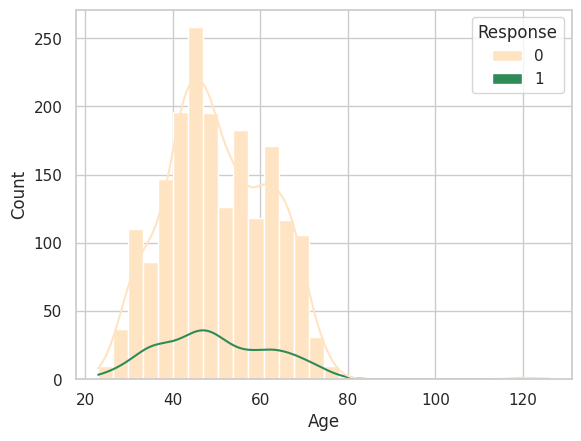

In [ ]:
sns.histplot(data=df_bi, kde=True, x='Age', hue=df_bi['Response'], bins=30,
             alpha=1, palette=['bisque', 'seagreen'])

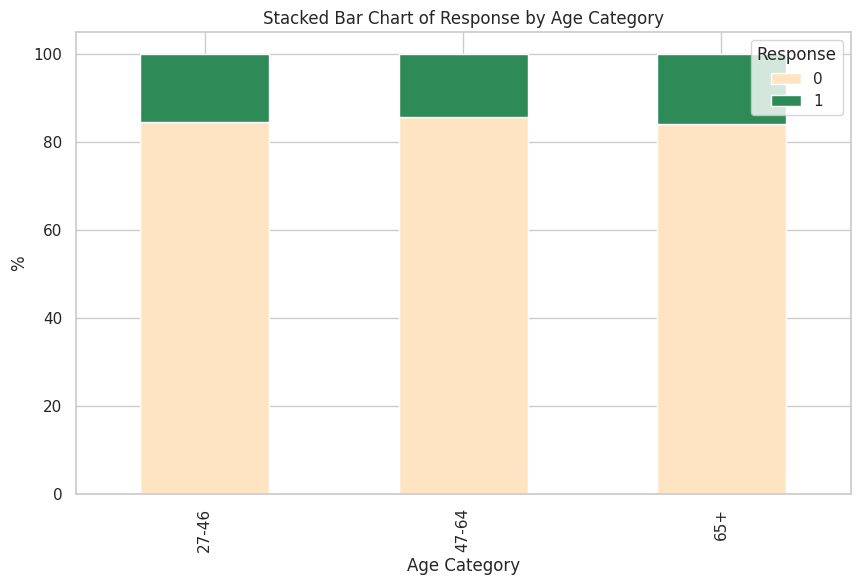

In [ ]:
age_cat=df_bi.groupby(['Age_Category', 'Response']).agg({'ID':'nunique'}).reset_index()
age_cat['%']=round(100*age_cat['ID']/age_cat.groupby('Age_Category')['ID'].transform('sum'),2)
age_cat

# Pivot the dataframe to create a stacked bar chart
age_pivot = age_cat.pivot(index='Age_Category', columns='Response', values='%')

# Plot stacked bar chart
age_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['bisque', 'seagreen'])
plt.xlabel('Age Category')
plt.ylabel('%')
plt.title('Stacked Bar Chart of Response by Age Category')
plt.legend(title='Response', loc='upper right')
plt.show()

Berdasarkan kategori umur, persentase customer yang merespon campaign pada setiap kategori umur adalah sama, yaitu sekitar 15% dari customer pada masing-masing kategori umur.

Text(0.5, 1.0, 'Customers Response by Age')

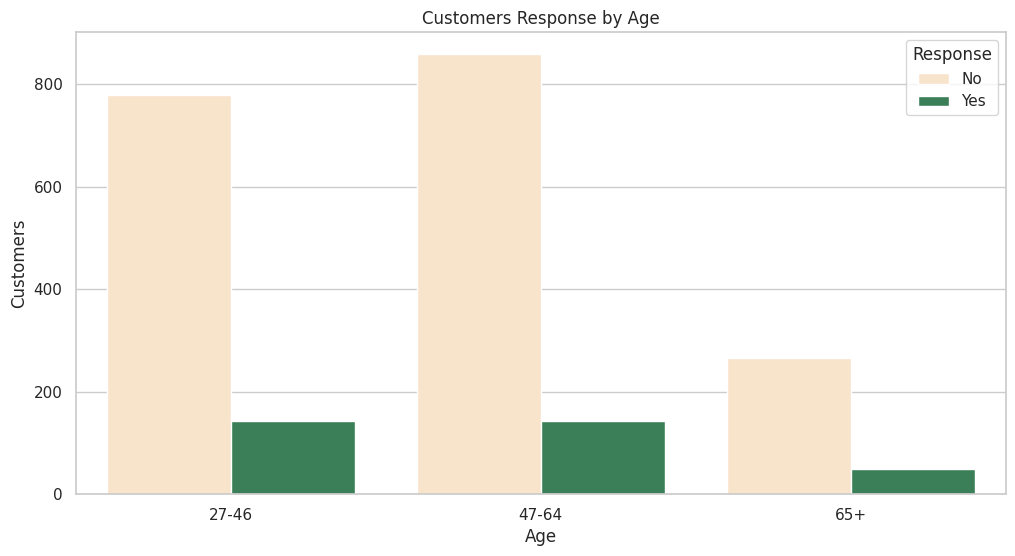

In [ ]:
labels = ['27-46','47-64','65+']
ranges=[0,46,64,83]
df_bi['Age_Category']=pd.cut(df_bi['Age'],bins=ranges,labels=labels)

plt.figure(figsize=(12,6))
sns.countplot(data=df_bi,x=df_bi['Age_Category'],hue=df_bi['Response'], palette=['bisque', 'seagreen'])
plt.xlabel('Age')
plt.ylabel('Customers')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Customers Response by Age')

**Kategori Umur Berdasarkan Pendidikan**
> Lebih banyak orang yang rentangnya berada di umur 47 hingga 64 tahun terutama yang lulus sekolah wajib (graduation) sehingga ada baiknya jika target usia serta jenis pelanggan dari toko disesuaikan dengan data tersebut.

#### Marital Status

In [ ]:
# Define a function to categorize marital status
def categorize_marital_status(status):
    if status.lower() in ['single', 'alone', 'absurd', 'yolo']:
        return 'Single'
    elif status.lower() in ['together', 'married']:
        return 'In a Relationship'
    elif status.lower() == 'divorced':
        return 'Divorced'
    elif status.lower() == 'widow':
        return 'Widow'
    else:
        return 'Other'

# Apply the function to create a new column 'RelationshipStatus'
df_bi['RelationshipStatus'] = df_bi['Marital_Status'].apply(categorize_marital_status)

Text(0.5, 0, 'Relationship Status')

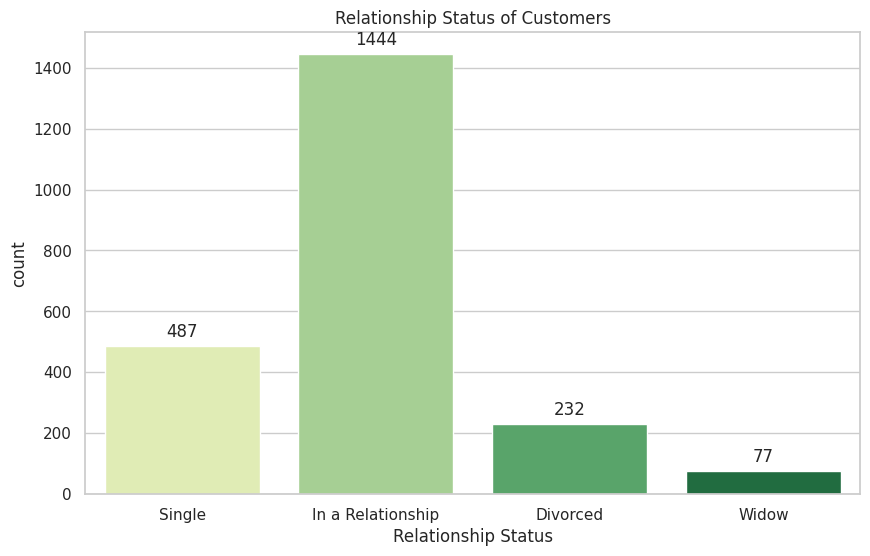

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='RelationshipStatus', data=df_bi, palette='YlGn')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Relationship Status of Customers')
plt.xlabel('Relationship Status')

Text(0.5, 1.0, 'Customers Response by Relationship Status')

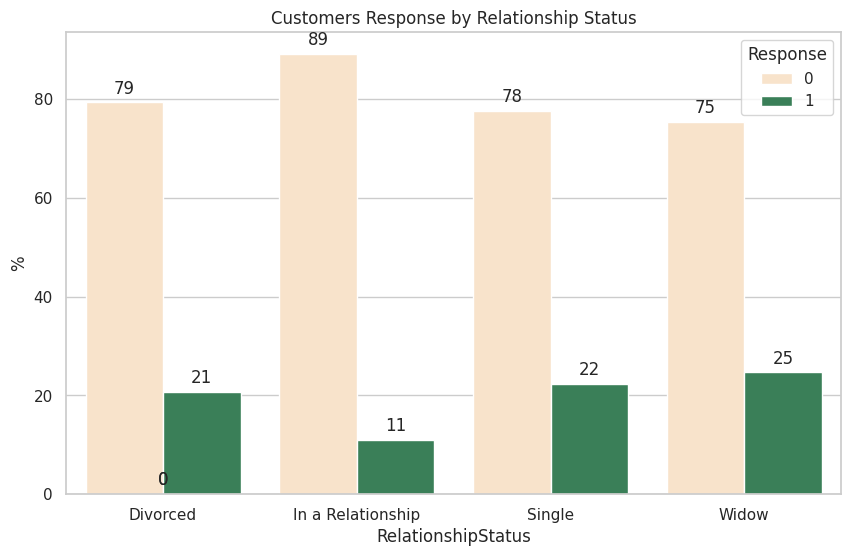

In [ ]:
age_cat=df_bi.groupby(['RelationshipStatus', 'Response']).agg({'ID':'nunique'}).reset_index()
age_cat['%']=round(100*age_cat['ID']/age_cat.groupby('RelationshipStatus')['ID'].transform('sum'),2)
age_cat

plt.figure(figsize=(10,6))
ax=sns.barplot(x='RelationshipStatus', y='%', hue='Response', data=age_cat, palette=['bisque', 'seagreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Customers Response by Relationship Status')

Secara persentase, persentase customer yang merespon campaign dengan status `In a Relationship` adalah yang paling rendah `(11%)` dibanding customer pada relationship status lainnya.

#### Metode Pembelanjaan

Text(0.5, 1.0, 'Jumlah Transaksi Berdasarkan Platform ')

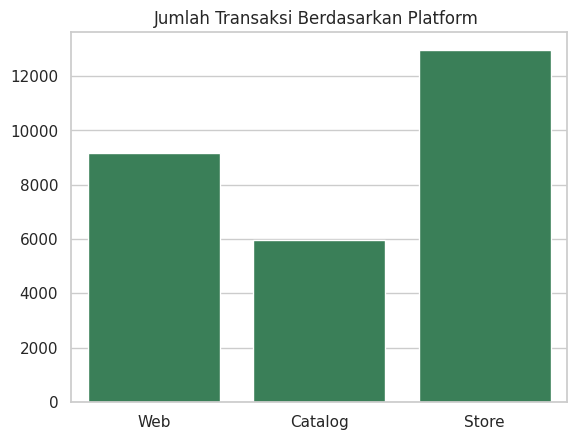

In [ ]:
places =['Web','Catalog','Store']
values =[df_bi[col].sum() for col in df_bi.columns[16:19]]
sns.barplot(x=places,y=values, color='seagreen')
plt.title('Jumlah Transaksi Berdasarkan Platform ')


In [ ]:
df.columns[16:19]

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], dtype='object')

**Platform**
> Customer lebih banyak melakukan pembelian di store, sehingga ada baiknya untuk lebih menggencarkan promosi di store.

In [ ]:
convertion_rate=round(100*df_bi['NumWebPurchases'].sum()/df_bi['NumWebVisitsMonth'].sum(),2)
print(f'Convertion Rate customer : {convertion_rate}')

Convertion Rate customer : 76.83


#### Kidhome-Teenhome

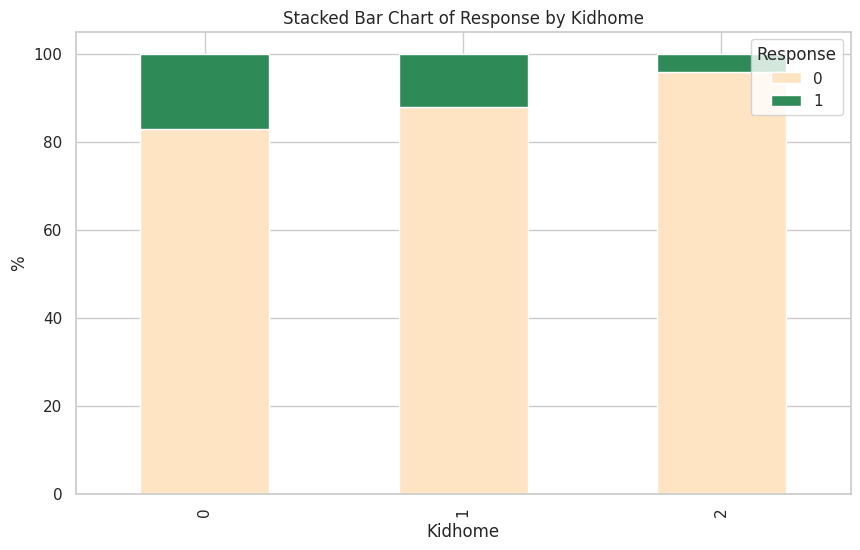

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

anak = df_bi.groupby(['Response', 'Kidhome']).agg({'ID': 'nunique'}).reset_index()
anak['%'] = round(100 * anak['ID'] / anak.groupby('Kidhome')['ID'].transform('sum'), 2)

# Pivot the dataframe to create a stacked bar chart
anak_pivot = anak.pivot(index='Kidhome', columns='Response', values='%')

# Plot stacked bar chart
anak_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['bisque', 'seagreen'])
plt.xlabel('Kidhome')
plt.ylabel('%')
plt.title('Stacked Bar Chart of Response by Kidhome')
plt.legend(title='Response', loc='upper right')
plt.show()


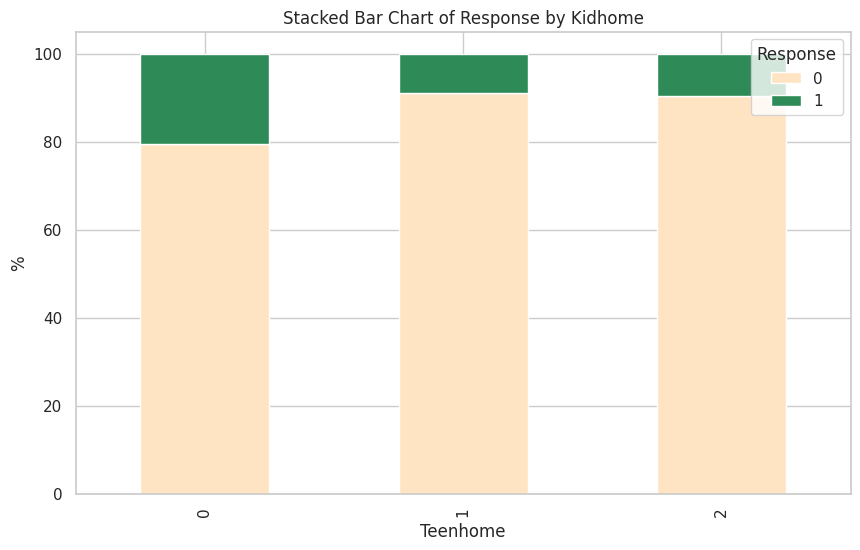

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

anak = df_bi.groupby(['Response', 'Teenhome']).agg({'ID': 'nunique'}).reset_index()
anak['%'] = round(100 * anak['ID'] / anak.groupby('Teenhome')['ID'].transform('sum'), 2)

# Pivot the dataframe to create a stacked bar chart
anak_pivot = anak.pivot(index='Teenhome', columns='Response', values='%')

# Plot stacked bar chart
anak_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['bisque', 'seagreen'])
plt.xlabel('Teenhome')
plt.ylabel('%')
plt.title('Stacked Bar Chart of Response by Kidhome')
plt.legend(title='Response', loc='upper right')
plt.show()


In [ ]:
df_bi['kepemilikan_anak']=np.where(df_bi['Kidhome']+df_bi['Teenhome'] > 0, 'Yes', 'No')

df_bi.groupby(['kepemilikan_anak']).agg({'ID':'nunique', 'Total':'mean'}).reset_index()

,kepemilikan_anak,ID,Total
0,No,638,1106.029781
1,Yes,1602,406.579900


Text(0.5, 1.0, 'Distribution of Recency by Response')

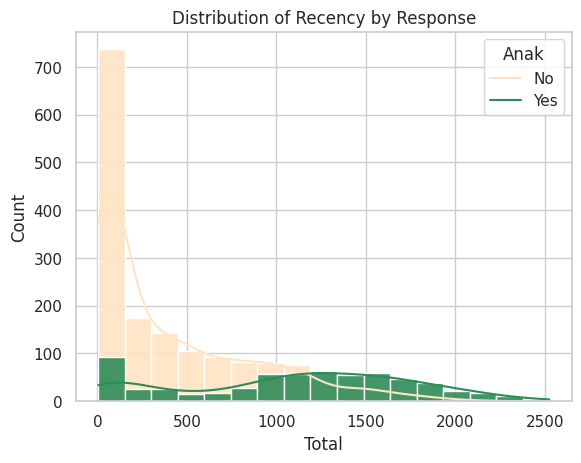

In [ ]:
sns.histplot(x='Total', kde=True, hue='kepemilikan_anak', data=df_bi, palette=['seagreen', 'bisque'],
             hue_order=['No','Yes'], alpha=0.9)
plt.legend(title='Anak', labels=['No', 'Yes'])
plt.title('Distribution of Recency by Response')

In [ ]:
anak_response=df_bi.groupby(['kepemilikan_anak','Response']).agg({'ID':'nunique'}).reset_index()
anak_response['%']=round(100*anak_response['ID']/anak_response.groupby('kepemilikan_anak')['ID'].transform('sum'), 2)
anak_response

,kepemilikan_anak,Response,ID,%
0,No,0,469,73.51
1,No,1,169,26.49
2,Yes,0,1437,89.70
3,Yes,1,165,10.30


Text(0.5, 1.0, 'Customers Response by Relationship Status')

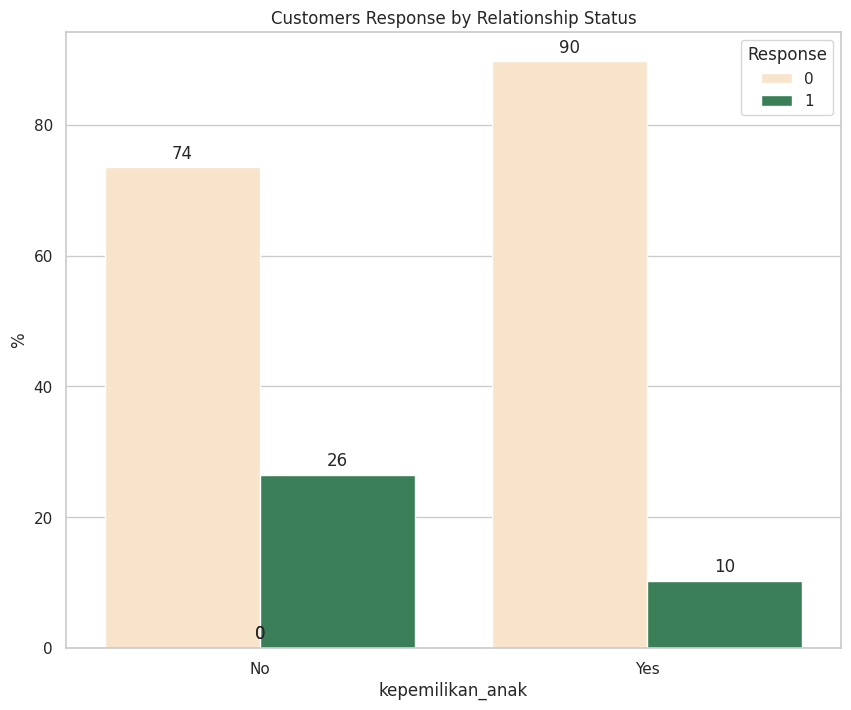

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='kepemilikan_anak', y='%', hue='Response', data=anak_response, palette=['bisque', 'seagreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Customers Response by Relationship Status')

#### Recency

Text(0.5, 1.0, 'Distribution of Recency by Response')

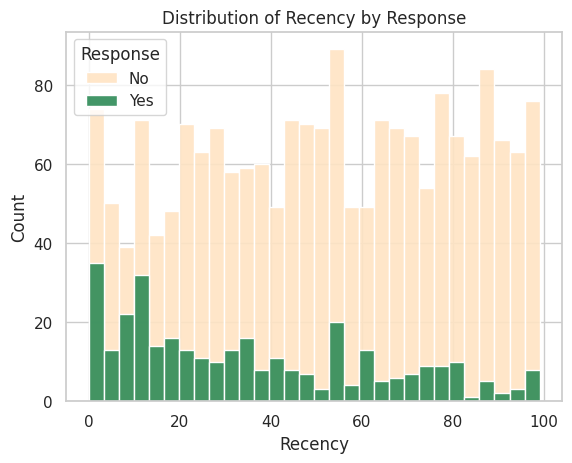

In [ ]:
#sns.set_palette("YlGn_r")
sns.histplot(x='Recency', hue='Response', bins=30, palette=['seagreen', 'bisque'],
             data=df_bi, hue_order=[1,0], alpha=0.9)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Distribution of Recency by Response')

Text(0.5, 1.0, 'Mean of Recency by Response')

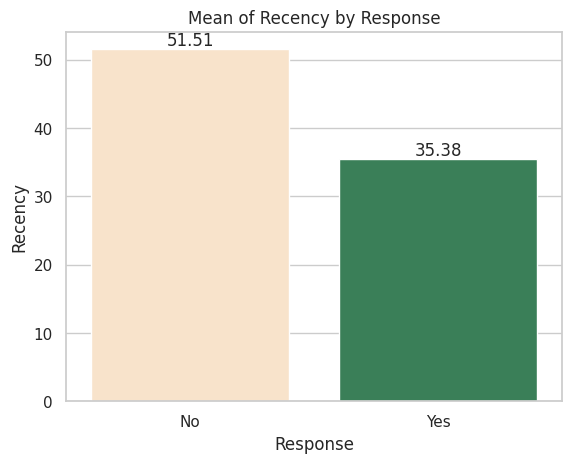

In [ ]:
df_group_recency = df_bi.groupby(['Response']).agg({'Recency':'mean'}).reset_index()
df_group_recency['Recency']=round(df_group_recency['Recency'],2)

ax=sns.barplot(x='Response', y='Recency', palette=['bisque', 'seagreen'], data=df_group_recency)
ax.set_xticklabels(['No', 'Yes'])
for i, value in enumerate(df_group_recency['Recency']):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.xlabel('Response')
plt.ylabel('Recency')
plt.title('Mean of Recency by Response')

#### Campaign

## Data Cleansing & Feature Engineering

### Missing Value Handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
print(df.isna().any())

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
print(df.isna().any())

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


### Invalid Value Handling

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df=df[df['Income']!=666666]

Pada feature `Income` terdapat nilai $666666 yang nilainya terlalu jauh dari nilai `Income` lainnya, diperkirakan ini merupakan nilai invalid. Oleh karena itu amatan tersebut dikeluarkan.

In [ ]:
df=df[df['Year_Birth']!=1893]

Pada feature `Year_Birth` terdapat customer yang lahir pada tahun 1893, yang jika dihitung umurnya per 2019 mencapai 126 tahun. Karena jarang sekali manusia mencapai usia tersebut maka amatan tersebut dianggap invalid.

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.00000,2214.000000,2214.0,2214.0,2214.000000
mean,5584.171183,1968.850949,51966.152213,0.441734,0.505420,49.036134,305.359530,26.373532,167.136405,37.664860,...,5.319332,0.073622,0.074074,0.073171,0.064137,0.01355,0.009485,3.0,11.0,0.150407
std,3247.774914,11.880844,21530.475146,0.536926,0.544219,28.950861,337.362404,39.807082,224.335771,54.769316,...,2.426249,0.261214,0.261951,0.260475,0.245053,0.11564,0.096950,0.0,0.0,0.357550
min,0.000000,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
25%,2814.250000,1959.000000,35265.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
75%,8417.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.750000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.0,11.0,1.000000


In [ ]:
df=df[df['Year_Birth']!=1899]

Pada feature `Year_Birth` terdapat customer yang lahir pada tahun 1899, yang jika dihitung umurnya per 2019 mencapai 120 tahun. Karena jarang sekali manusia mencapai usia tersebut maka amatan tersebut dianggap invalid.

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.0,2213.0,2213.000000
mean,5586.174876,1968.882512,51951.888387,0.441934,0.505648,49.042024,305.156349,26.320380,166.957976,37.634885,...,5.321283,0.073656,0.074108,0.072752,0.064166,0.013556,0.009489,3.0,11.0,0.150474
std,3247.139926,11.790314,21524.875604,0.536965,0.544236,28.956077,337.303133,39.737417,224.229282,54.763527,...,2.425058,0.261269,0.262005,0.259788,0.245104,0.115666,0.096972,0.0,0.0,0.357617
min,0.000000,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2815.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51369.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df=df[df['Year_Birth']!=1900]

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,...,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,3.0,11.0,0.150542
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,...,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.0,0.0,0.357683
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Pada feature `Year_Birth` terdapat customer yang lahir pada tahun 1900, yang jika dihitung umurnya per 2019 mencapai 119 tahun. Karena jarang sekali manusia mencapai usia tersebut maka amatan tersebut dianggap invalid.

### Duplicate Handling

In [ ]:
print(df.duplicated('ID').any())

False


### Outliers Handling

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

numerik = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue']
filtered_entries = np.array([True] * len(df))
for col in numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df_out= df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_out)}')

Jumlah baris sebelum memfilter outlier: 2212
Jumlah baris setelah memfilter outlier: 1506


In [ ]:
print((len(df)-len(df_out))/len(df))

0.3191681735985534


Jika dilakukan penghapusan data outlier, data akan berkurang sebanyak 32%. Oleh karena itu untuk menghindari terjadinya kehilangan informasi yang terlalu banyak, maka akan digunakan algoritma yang robust terhadap outlier.

### Feature Extraction

**Mapping the marital status to four categories**

In [ ]:
# Define a function to categorize marital status
def categorize_marital_status(status):
    if status.lower() in ['single', 'alone', 'absurd', 'yolo']:
        return 'Single'
    elif status.lower() in ['together', 'married']:
        return 'In a Relationship'
    elif status.lower() == 'divorced':
        return 'Divorced'
    elif status.lower() == 'widow':
        return 'Widow'
    else:
        return 'Other'

# Apply the function to create a new column 'RelationshipStatus'
df['RelationshipStatus'] = df['Marital_Status'].apply(categorize_marital_status)

Karena jumlah kategori dari marital status yang terlalu banyak oleh karena itu dilakukan pengategorian ulang sebagai berikut :
* `Alone`, `Absurd`, dan `YOLO` digabungkan dengan kategori `Single`
* `Together` dan `Married` digabung menjadi kategori `In a Relationship`

Sehingga kategori-kategori yang terdapat pada feature `RelationshipStatus` adalah `Single`, `In a Relationship`, `Divorced`, dan `Widow`.

**Membuat feature baru `TotalChildren`**

In [ ]:
# Calculate the total number of children and teenagers in the household
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

Feature `TotalChildren` menjumlahan jumlah `Kidhome` dan `Teenhome`

**Kategori Education Level**

In [ ]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

Karena education level `2n Cycle` setara dengan `Master`, oleh karena itu kategori `2n Cycle` digabung dengan kategori `Master`.

**Feature Age**

In [ ]:
# Calculate customer's age,assuming this year is 2019

df['Age']=2019-df['Year_Birth']

Untuk mengetahui usia dari customer dilakukan feature extraction dari feature `Year_Birth`. Dengan mengasumsikan data per tahun 2019, dilakukan perhitungan usia customer.

**Membuat Feature baru `Consumable_Expenses`**

In [ ]:
# Combine specified columns into a new column 'Consumable_Expenses'
df['Consumable_Expenses'] = df[['MntFishProducts', 'MntMeatProducts',
                                'MntFruits', 'MntSweetProducts', 'MntWines']].sum(axis=1)

`Consumable_Expenses` menjumlahkan pengeluaran customer pada barang-barang yang dapat dikonsumsi, yaitu produk ikan, daging, buah, sweet product, dan wine.

**Feature `Non_Consumable_Expenses`**

In [ ]:
# Rename 'MntGoldProds' to 'Non_Consumable_Expenses'
df.rename(columns={'MntGoldProds': 'Non_Consumable_Expenses'}, inplace=True)

Karena gold bukan barang konsumsi, feature tersebut diganti dengan nama Non_Consumable_Expenses.

**Feature `Frequency_Online`**

In [ ]:
# Combine specified columns into a new column 'Frequency_Online'
df['Frequency_Online'] = df[['NumCatalogPurchases', 'NumWebPurchases']].sum(axis=1)

Feature `Frequency_Online` menjumlahkan pembelian melalui catalog dan web.

**Feature `AccCamp`**

In [ ]:
df['AccCamp']=df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

Feature `AccCamp` menjumlahkan total campaign yang pernah di respon oleh customer.

**Feature `Frequency_Offline`**

In [ ]:
# Rename 'NumStorePurchases' to 'Frequency_Offline'
df.rename(columns={'NumStorePurchases': 'Frequency_Offline'}, inplace=True)

**Feature `Frequency_Promo`**

In [ ]:
# Rename 'NumDealsPurchases' to 'Frequency_Promo'
df.rename(columns={'NumDealsPurchases': 'Frequency_Promo'}, inplace=True)

**Feature `CustomerLoyalty`**

In [ ]:
# Convert 'DtCustomer' to datetime format
import datetime as dt

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate customer loyalty as the difference in days from the assumed current date (2019-01-01)
current_Day = dt.datetime(2019, 1, 1)

df['CustomerLoyalty']=(current_Day-df['Dt_Customer'])

# Number of days as customer

df['CustomerLoyalty'] = df['CustomerLoyalty'].dt.days

Feature `CustomerLoyalty` berisi informasi mengenai sudah berapa lama (dalam satuan hari) customer menjadi member. Feature ini diekstraksi dari feature `Dt_Customer` yaitu tanggal customer terdaftar sebagai member. Diasumsikan tanggal pengambilan data pada 01-01-2019.

### Feature Encoding

In [ ]:
# melakukan label encoding
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(map_edu)
print("Education (Train) = ", np.sort(df['Education'].unique()))

Education (Train) =  [0 1 2 3]


Label encoding dilakukan pada feature `Education` menjadi sebagai berikut :    
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3

In [ ]:
df=pd.get_dummies(df, columns=['RelationshipStatus'], drop_first=True)

### Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID                                    2212 non-null   int64         
 1   Year_Birth                            2212 non-null   int64         
 2   Education                             2212 non-null   int64         
 3   Marital_Status                        2212 non-null   object        
 4   Income                                2212 non-null   float64       
 5   Kidhome                               2212 non-null   int64         
 6   Teenhome                              2212 non-null   int64         
 7   Dt_Customer                           2212 non-null   datetime64[ns]
 8   Recency                               2212 non-null   int64         
 9   MntWines                              2212 non-null   int64         
 10  

In [ ]:
df_select = df.drop(['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntFishProducts',
              'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases',
              'NumWebPurchases', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5',
              'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

Pada tahap ini feature-feature yang tidak relevan dan redundance keluarkan karena tidak akan digunakan untuk membangun model prediksi respon customer terhadap marketing campaign.

* Feature `ID` tidak relevan digunakan dalam modelling karena hanya sebagai primary key
* Feature `Year_Birth` dikeluarkan karena karena sudah diperoleh feature `Age`
* Feature `Marital_Status` tidak digunakan karena sudah dilakukan one-hot-encoding sehingga diperoleh feature `RelationshipStatus_In a Relationship`, `RelationshipStatus_Single`, `RelationshipStatus_Widow`
* `Kidhome` dan `Teenhome` digantikan oleh feature `TotalChildren`
* Feature `Dt_Customer` sudah diektrak menjadi feature `ConsumerLoyalty`
* Feature `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, dan `MntSweetProducts` digabung menjadi feature `Consumable_Expenses`
* Feature `NumWebPurchases` dan `NumCatalogPurchases` dijumlahkan menjadi `Frequency_Online`
* Feature `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, dan `AcceptedCmp5` dijumlahkan menjadi `AccCamp`
* Feature `Z_CostContact` dan `Z_Revenue` hanya memiliki satu nilai atau berdistribusi uniform, sehingga tidak akan digunakan untuk modelling

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Education                             2212 non-null   int64  
 1   Income                                2212 non-null   float64
 2   Recency                               2212 non-null   int64  
 3   Non_Consumable_Expenses               2212 non-null   int64  
 4   Frequency_Promo                       2212 non-null   int64  
 5   Frequency_Offline                     2212 non-null   int64  
 6   NumWebVisitsMonth                     2212 non-null   int64  
 7   Complain                              2212 non-null   int64  
 8   Response                              2212 non-null   int64  
 9   TotalChildren                         2212 non-null   int64  
 10  Age                                   2212 non-null   int64  
 11  Consumable_Expens

In [ ]:
df_select.head()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,Response,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
0,1,58138.0,58,88,3,4,7,0,1,0,62,1529,18,0,2310,0,1,0
1,1,46344.0,38,6,2,2,5,0,0,2,65,21,2,0,1760,0,1,0
2,1,71613.0,26,42,1,10,4,0,0,0,54,734,10,0,1959,1,0,0
3,1,26646.0,26,5,2,4,6,0,0,1,35,48,2,0,1786,1,0,0
4,3,58293.0,94,15,5,6,5,0,0,1,38,407,8,0,1808,1,0,0


In [ ]:
df_select.describe()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,Response,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1.664105,51958.810579,49.019439,43.925859,2.324593,5.806510,5.321429,0.009042,0.150542,0.947559,50.086347,563.342224,6.760398,0.298373,2000.714286,0.645570,0.215642,0.034358
std,0.840363,21527.278844,28.943121,51.706981,1.924507,3.250939,2.425597,0.094678,0.357683,0.749466,11.701599,576.934299,4.721891,0.679570,202.494886,0.478449,0.411360,0.182188
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,4.000000,0.000000,0.000000,1647.000000,0.000000,0.000000,0.000000
25%,1.000000,35233.500000,24.000000,9.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,42.000000,55.750000,2.000000,0.000000,1827.000000,0.000000,0.000000,0.000000
50%,1.000000,51371.000000,49.000000,24.500000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,49.000000,343.000000,6.000000,0.000000,2003.000000,1.000000,0.000000,0.000000
75%,2.000000,68487.000000,74.000000,56.000000,3.000000,8.000000,7.000000,0.000000,0.000000,1.000000,60.000000,964.000000,10.000000,0.000000,2176.000000,1.000000,0.000000,0.000000
max,3.000000,162397.000000,99.000000,321.000000,15.000000,13.000000,20.000000,1.000000,1.000000,3.000000,79.000000,2491.000000,28.000000,4.000000,2346.000000,1.000000,1.000000,1.000000


### Split-Data

In [ ]:
X = df_select.drop('Response', axis=1)
y = df_select[['Response']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Membagi data menjadi data training dan testing dengan rasio 80:20. Data training akan digunakan untuk membangun model prediksi, sedangkan data testing akan digunakan untuk mengevaluasi model prediksi yang diperoleh.

In [ ]:
print(f'Ukuran data training : {X_train.shape}')
print(f'Ukuran data testing : {X_test.shape}')

Ukuran data training : (1659, 17)
Ukuran data testing : (553, 17)


### Feature Transformation

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1280 to 1315
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Education                             1659 non-null   int64  
 1   Income                                1659 non-null   float64
 2   Recency                               1659 non-null   int64  
 3   Non_Consumable_Expenses               1659 non-null   int64  
 4   Frequency_Promo                       1659 non-null   int64  
 5   Frequency_Offline                     1659 non-null   int64  
 6   NumWebVisitsMonth                     1659 non-null   int64  
 7   Complain                              1659 non-null   int64  
 8   TotalChildren                         1659 non-null   int64  
 9   Age                                   1659 non-null   int64  
 10  Consumable_Expenses                   1659 non-null   int64  
 11  Frequency_Onli

In [ ]:
# melakukan scaling dengan RobustScaler
from sklearn.preprocessing import RobustScaler

# Assuming X is a pandas DataFrame containing your data
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Create an instance of RobustScaler
ss = RobustScaler()

for n in numerical_features:
    # Check if the column contains numerical data
    if X[n].dtype in ['float64', 'int64']:
        # Fit and transform the training data
        #scaler = ss.fit(X_train[[n]])
        X_train[n] = ss.fit_transform(X_train[[n]])

        # Transform the testing data using the same scaler
        X_test[n] = ss.transform(X_test[[n]])

In [ ]:
X_train.head()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
1280,0.0,0.833690,-0.74,4.717391,-0.5,0.6,-1.333333,0.0,-1.0,-0.764706,1.713496,0.500,1.0,0.946479,1,0,0
1144,0.0,0.362911,0.68,2.391304,-0.5,1.6,-1.000000,0.0,-1.0,1.470588,0.695796,0.625,0.0,-0.329577,0,0,1
1566,1.0,0.383910,0.86,-0.260870,1.0,1.0,-0.666667,0.0,0.0,0.352941,1.014381,0.375,1.0,0.622535,0,1,0
2088,0.0,-0.629172,-0.68,-0.260870,0.0,-0.2,-1.000000,0.0,0.0,-0.588235,-0.327434,-0.500,0.0,-0.239437,0,1,0
448,0.0,-0.837052,-0.86,-0.413043,0.0,-0.4,0.666667,0.0,0.0,-0.352941,-0.328540,-0.500,0.0,0.090141,1,0,0


In [ ]:
feat=['Education', 'Income', 'Recency', 'Non_Consumable_Expenses',
       'Frequency_Promo', 'Frequency_Offline', 'NumWebVisitsMonth', 'Complain',
       'TotalChildren', 'Age', 'Consumable_Expenses', 'Frequency_Online',
       'AccCamp', 'CustomerLoyalty', 'RelationshipStatus_In a Relationship',
       'RelationshipStatus_Single', 'RelationshipStatus_Widow']

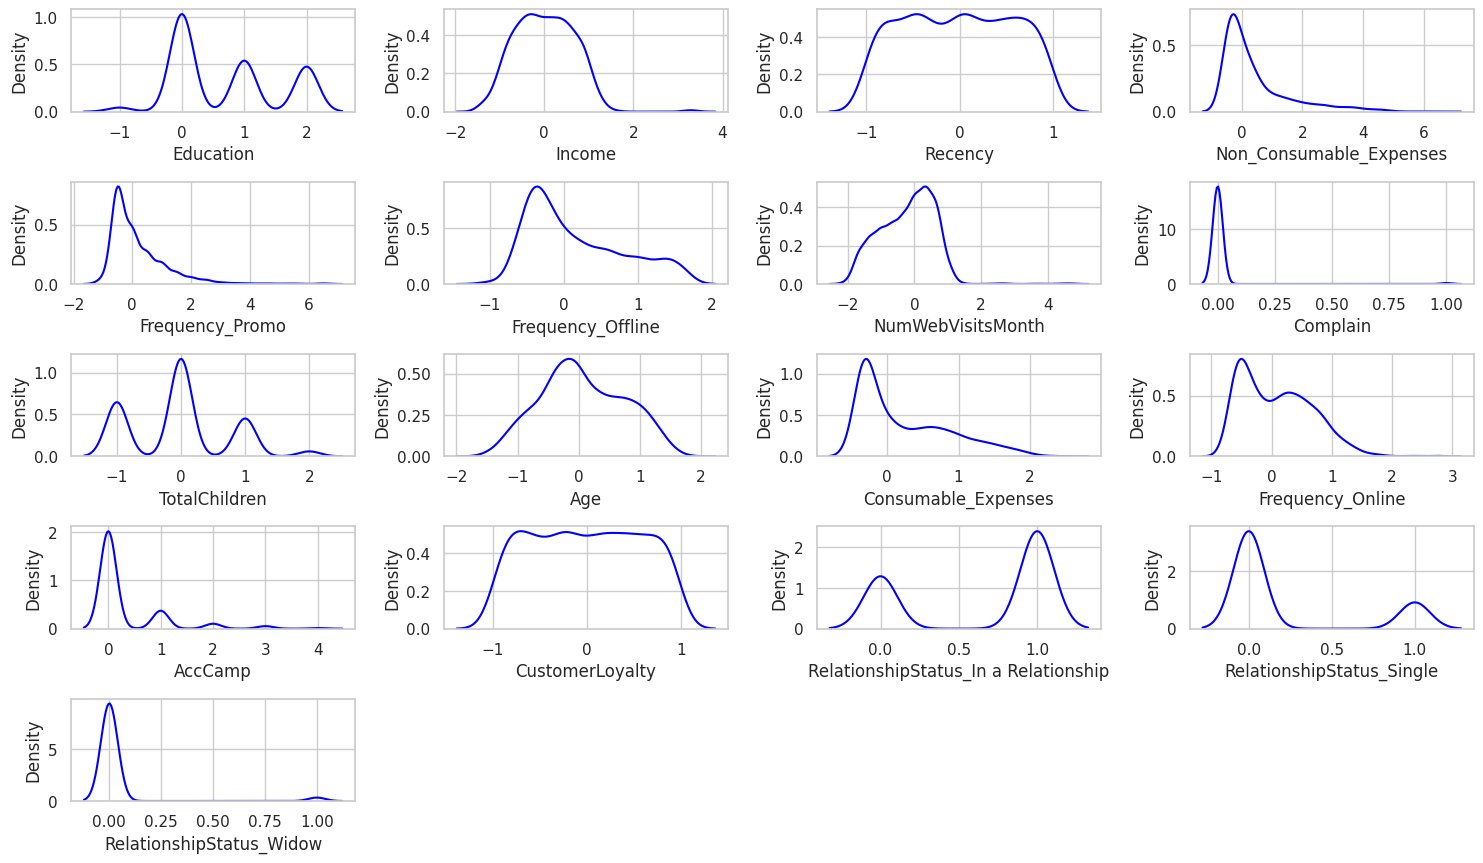

In [ ]:
plt.figure(figsize=(15,10))
features = feat
for i in range (0, len(features)):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(x=X_train[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
X_train.describe()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,0.693189,0.013963,-0.016817,0.421011,0.170886,0.161061,-0.218405,0.009644,-0.033153,0.065029,0.240938,0.090491,0.305606,-0.005849,0.650392,0.212176,0.033755
std,0.842491,0.653508,0.577827,1.116501,0.955053,0.653470,0.796335,0.097760,0.757423,0.684353,0.633100,0.582832,0.687673,0.571091,0.476990,0.408972,0.180653
min,-1.000000,-1.518584,-1.000000,-0.521739,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,-1.529412,-0.371681,-0.750000,0.000000,-0.991549,0.000000,0.000000,0.000000
25%,0.000000,-0.489363,-0.520000,-0.326087,-0.500000,-0.400000,-0.666667,0.000000,-1.000000,-0.411765,-0.314712,-0.500000,0.000000,-0.507042,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.510637,0.480000,0.673913,0.500000,0.600000,0.333333,0.000000,0.000000,0.588235,0.685288,0.500000,0.000000,0.492958,1.000000,0.000000,0.000000
max,2.000000,3.392377,0.980000,6.456522,6.500000,1.600000,4.666667,1.000000,2.000000,1.764706,2.379425,2.750000,4.000000,0.974648,1.000000,1.000000,1.000000


In [ ]:
X_test.describe()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.576854,0.024967,-0.027993,0.469652,0.136528,0.162025,-0.249548,0.007233,-0.110307,0.060525,0.265425,0.108725,0.276673,0.025597,0.631103,0.226040,0.036166
std,0.828592,0.671847,0.582403,1.146708,0.983968,0.640825,0.844379,0.084817,0.722655,0.700738,0.653504,0.612248,0.654789,0.568217,0.482943,0.418644,0.186873
min,-1.000000,-1.496668,-1.000000,-0.521739,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,-1.470588,-0.370575,-0.750000,0.000000,-0.994366,0.000000,0.000000,0.000000
25%,0.000000,-0.496210,-0.520000,-0.326087,-0.500000,-0.400000,-1.000000,0.000000,-1.000000,-0.470588,-0.314159,-0.375000,0.000000,-0.425352,0.000000,0.000000,0.000000
50%,0.000000,-0.020999,-0.020000,0.065217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011062,0.000000,0.000000,0.022535,1.000000,0.000000,0.000000
75%,1.000000,0.541937,0.480000,0.739130,0.500000,0.600000,0.333333,0.000000,0.000000,0.705882,0.727876,0.500000,0.000000,0.507042,1.000000,0.000000,0.000000
max,2.000000,3.234839,0.980000,4.869565,6.500000,1.600000,4.666667,1.000000,2.000000,1.588235,2.310841,2.750000,4.000000,0.969014,1.000000,1.000000,1.000000


### Imbalanced Class Handling

**Perbandingan kelas sebelum balancing**

<Axes: >

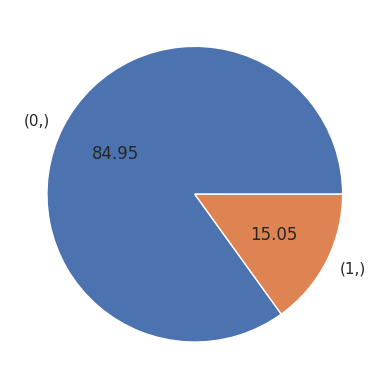

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')
plt.title('Perbandingan Kelas Response')

In [ ]:
y.value_counts()

Response
0           1879
1            333
dtype: int64

In [ ]:
y_train.value_counts()

Response
0           1409
1            250
dtype: int64

Karena terjadi imbalanced yang tinggi antar kedua kelas tersebut, oleh karena itu dilakukan balancing agar perbandingan kelas minoritas (Yes=1) tidak jauh berbeda dengan kelas mayoritas (No=0).

**Balancing dengan Random Undersampling**

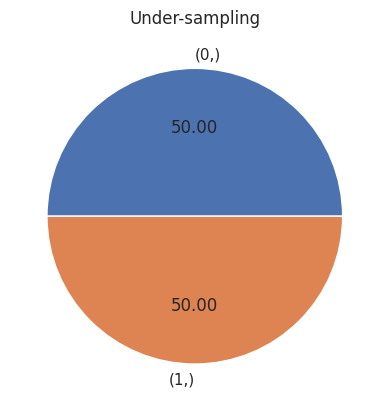

In [ ]:
#random undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x_res, y_res = rus.fit_resample(X_train,y_train)

ax=y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
y_res.value_counts()

Response
0           250
1           250
dtype: int64

Dengan random under sampling, jumlah amatan setiap kelas disamakan dengan cara menghapus amatan dari kelas mayoritas sehingga jumlahnya sama dengan jumlah amatan pada kelas minoritas.

**Balancing dengan Random Over Sampling**

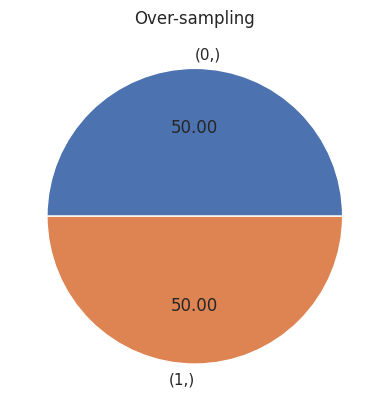

In [ ]:
# random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
x_ros, y_ros = ros.fit_resample(X_train,y_train)

ax=y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_ros.value_counts()

Response
0           1409
1           1409
dtype: int64

Dengan random over sampling, jumlah amatan setiap kelas disamakan dengan cara melakukan resampling amatan dari kelas minoritas sehingga jumlahnya sama dengan jumlah amatan pada kelas mayoritas. Namun hal ini dapat meningkatkan resiko overfitting.

**Balancing dengan SMOTE**

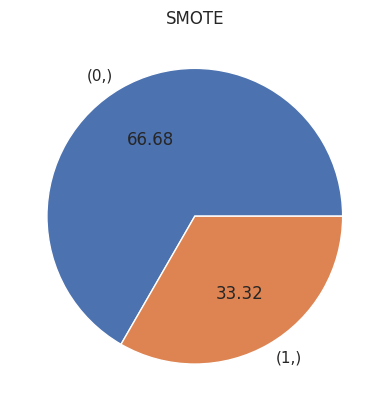

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train,y_train)

ax=y_SMOTE.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE")

In [ ]:
y_SMOTE.value_counts()

Response
0           1409
1            704
dtype: int64

Dengan SMOTE, jumlah amatan setiap kelas disamakan dengan cara membuat amatan baru berdasarkan amatan pada kelas minoritas sehingga jumlahnya sama dengan jumlah amatan pada kelas mayoritas.

**Keputusan**:
> Metode imbalance handling yang dipilih adalah SMOTE dengan mempertimbangkan resiko overfitting dan agar tidak kehilangan informasi yang banyak.

In [ ]:
X_SMOTE.head()

,Education,Income,Recency,Non_Consumable_Expenses,Frequency_Promo,Frequency_Offline,NumWebVisitsMonth,Complain,TotalChildren,Age,Consumable_Expenses,Frequency_Online,AccCamp,CustomerLoyalty,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow
0,0.0,0.833690,-0.74,4.717391,-0.5,0.6,-1.333333,0.0,-1.0,-0.764706,1.713496,0.500,1.0,0.946479,1,0,0
1,0.0,0.362911,0.68,2.391304,-0.5,1.6,-1.000000,0.0,-1.0,1.470588,0.695796,0.625,0.0,-0.329577,0,0,1
2,1.0,0.383910,0.86,-0.260870,1.0,1.0,-0.666667,0.0,0.0,0.352941,1.014381,0.375,1.0,0.622535,0,1,0
3,0.0,-0.629172,-0.68,-0.260870,0.0,-0.2,-1.000000,0.0,0.0,-0.588235,-0.327434,-0.500,0.0,-0.239437,0,1,0
4,0.0,-0.837052,-0.86,-0.413043,0.0,-0.4,0.666667,0.0,0.0,-0.352941,-0.328540,-0.500,0.0,0.090141,1,0,0


In [ ]:
X_train=X_SMOTE
y_train=y_SMOTE

In [ ]:
# menggabungkan data train dan test untuk cross-validation
X_cv = pd.concat([X_SMOTE,X_test])
y_cv = pd.concat([y_SMOTE,y_test])

## Modeling and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import pandas as pd



algorithms_list = [LogisticRegression, RandomForestClassifier, KNeighborsClassifier, SVC, DecisionTreeClassifier, AdaBoostClassifier, LGBMClassifier]

results = pd.DataFrame(columns=["Models", "Train_Accuracy", "CV_Accuracy", "Test_Accuracy", "Train_Precision", "CV_Precision", "Test_Precision",
                                "Train_Recall", "CV_Recall", "Test_Recall", "Train_f1_score", "CV_f1_score", "Test_f1_score"])

for algorithm in algorithms_list:
    # Modeling
    if algorithm == KNeighborsClassifier:
        model = algorithm()  # KNeighborsClassifier tidak memiliki parameter random_state
    else:
        model = algorithm(random_state=42)

    model_name = model.__class__.__name__

    # Cross-validation
    cv_accuracy = cross_val_score(model, X_cv, y_cv, cv=5, scoring='accuracy').mean()
    cv_precision = cross_val_score(model, X_cv, y_cv, cv=5, scoring='precision').mean()
    cv_recall = cross_val_score(model, X_cv, y_cv, cv=5, scoring='recall').mean()
    cv_f1_score = cross_val_score(model, X_cv, y_cv, cv=5, scoring='f1').mean()

    # Fit the model
    model.fit(X_SMOTE, y_SMOTE)

    # Predictions
    y_pred_train = model.predict(X_SMOTE)
    y_pred_test = model.predict(X_test)

    # Metrics for training set
    accuracy_train = accuracy_score(y_SMOTE, y_pred_train)
    precision_train = precision_score(y_SMOTE, y_pred_train)
    recall_train = recall_score(y_SMOTE, y_pred_train)
    f1_score_train = f1_score(y_SMOTE, y_pred_train)

    # Metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test)

    # Append results to the dataframe
    result = pd.DataFrame([[model_name, accuracy_train*100, cv_accuracy*100, accuracy_test*100,
                            precision_train*100, cv_precision*100, precision_test*100,
                            recall_train*100, cv_recall*100, recall_test*100,
                            f1_score_train*100, cv_f1_score*100, f1_score_test*100]],
                          columns=["Models", "Train_Accuracy", "CV_Accuracy", "Test_Accuracy",
                                   "Train_Precision", "CV_Precision", "Test_Precision",
                                   "Train_Recall", "CV_Recall", "Test_Recall",
                                   "Train_f1_score", "CV_f1_score", "Test_f1_score"])
    results = results.append(result, ignore_index=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 629, number of negative: 1503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295028 -> initscore=-0.871087
[LightGBM] [Info] Start training from score -0.871087
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 629, number of negative: 1504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

In [ ]:
results.sort_values('Test_Precision', ascending=False).reset_index()

,index,Models,Train_Accuracy,CV_Accuracy,Test_Accuracy,Train_Precision,CV_Precision,Test_Precision,Train_Recall,CV_Recall,Test_Recall,Train_f1_score,CV_f1_score,Test_f1_score
0,1,RandomForestClassifier,99.763370,90.886228,88.788427,100.000000,87.213883,67.796610,99.289773,80.830444,48.192771,99.643621,83.523541,56.338028
1,6,LGBMClassifier,99.763370,91.374033,88.245931,99.574468,86.936249,64.062500,99.715909,83.247601,49.397590,99.645138,84.577664,55.782313
2,3,SVC,91.717937,88.409961,88.607595,88.613139,83.060192,63.513514,86.221591,76.241232,56.626506,87.401008,79.375923,59.872611
3,5,AdaBoostClassifier,89.398959,86.572577,86.075949,86.474164,80.122678,53.409091,80.823864,72.446182,56.626506,83.553598,75.865908,54.970760
4,0,LogisticRegression,84.429721,84.471334,85.171790,80.388979,78.648639,50.537634,70.454545,65.185842,56.626506,75.094625,71.215571,53.409091
5,2,KNeighborsClassifier,92.711784,88.184329,84.267631,84.034653,76.701546,47.959184,96.448864,86.153350,56.626506,89.814815,81.012734,51.933702
6,4,DecisionTreeClassifier,99.763370,85.071498,83.182640,100.000000,74.528144,44.318182,99.289773,75.109248,46.987952,99.643621,74.566025,45.614035


#### Tuning dengan **RandomSearchCV**

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='precision', random_state=1, cv=5).fit(X_SMOTE, y_SMOTE)


In [ ]:
rs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=98, min_samples_leaf=6,
                       min_samples_split=12, n_estimators=53, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_classification_metrics(model, X, y):
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, model.predict_proba(X)[:, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))

    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False,
                xticklabels=["Not Response", "Response"],
                yticklabels=["Not Response", "Response"],
                annot_kws={"size": 14})

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    plt.show()

===Metrics on Training Set:===
Accuracy: 0.9664
Precision: 0.9675
Recall: 0.9304
F1 Score: 0.9486
ROC AUC Score: 0.9957


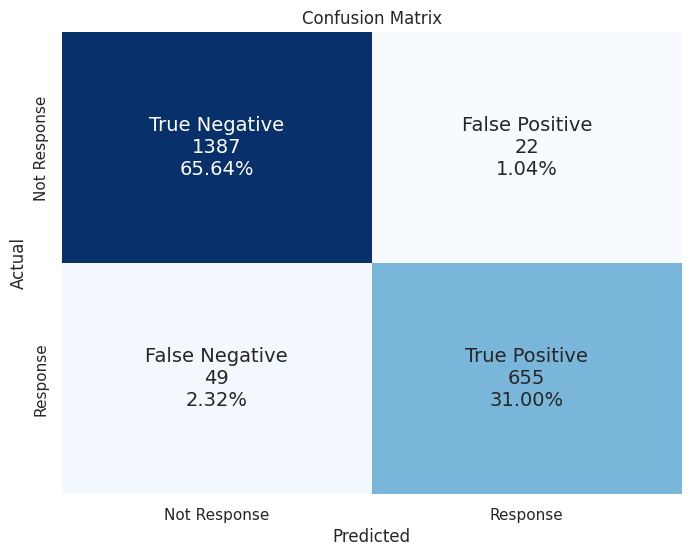


===Metrics on Test Set:===
Accuracy: 0.8825
Precision: 0.6500
Recall: 0.4699
F1 Score: 0.5455
ROC AUC Score: 0.8830


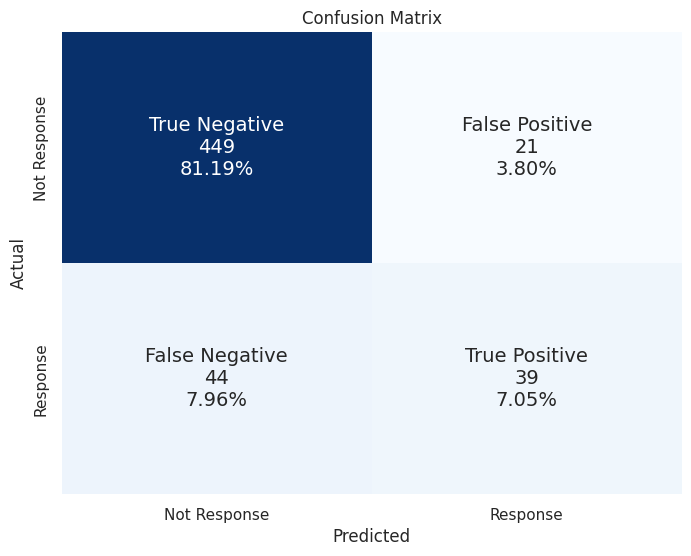

In [ ]:
best_rf_model = rs.best_estimator_

# Evaluate metrics on the training set
print("===Metrics on Training Set:===")
evaluate_classification_metrics(best_rf_model, X_SMOTE, y_SMOTE)

# Evaluate metrics on the test set
print("\n===Metrics on Test Set:===")
evaluate_classification_metrics(best_rf_model, X_test, y_test)

### GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()

rf_params = {'n_estimators': [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

rf_cv_model = GridSearchCV(rf,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_SMOTE,y_SMOTE)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [ ]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 1000}

In [ ]:
rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=300).fit(X_SMOTE,y_SMOTE)
y_pred = rf_tuned.predict(X_test)
precision_score(y_test, y_pred)

0.7222222222222222

Metrics on Training Set:
Accuracy: 0.9976
Precision: 0.9957
Recall: 0.9972
F1 Score: 0.9965
ROC AUC Score: 1.0000


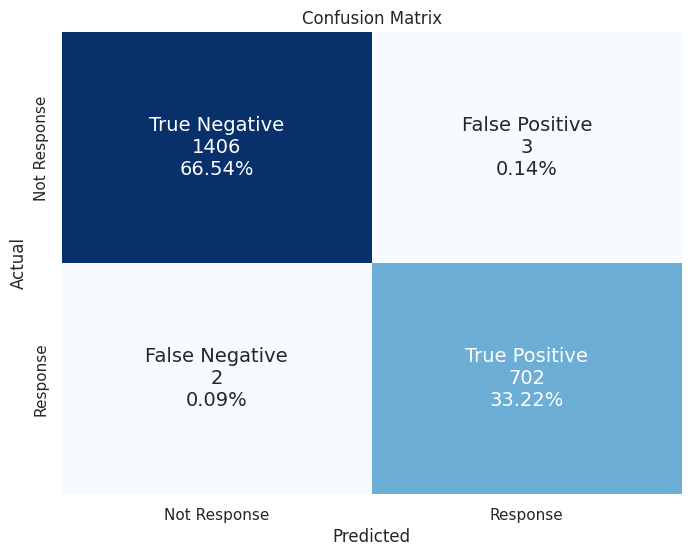


Metrics on Test Set:
Accuracy: 0.8933
Precision: 0.7222
Recall: 0.4699
F1 Score: 0.5693
ROC AUC Score: 0.8696


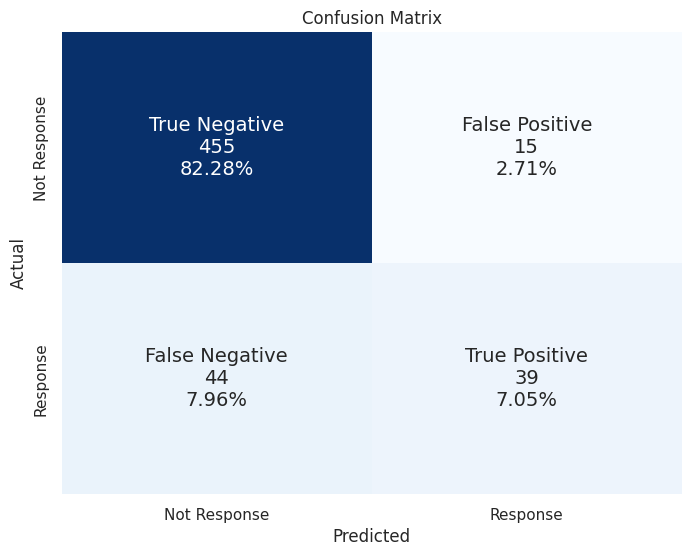

In [ ]:
# Evaluate metrics on the training set
print("Metrics on Training Set:")
evaluate_classification_metrics(rf_tuned, X_train, y_train)

# Evaluate metrics on the test set
print("\nMetrics on Test Set:")
evaluate_classification_metrics(rf_tuned, X_test, y_test)

Berdasarkan experiment yang telah dilakukan, diperoleh hasil sebagai berikut :
1. RandomSearchCV Tuning : Precision Test (65%)
3. GridSearchCV : Precision Test (72,22%)

Oleh karena itu yang akan digunakan untuk melakukan prediksi response pelanggan terhadap marketing campaign yang diberikan adalah model **GridCVTuning (rf_tuned)**.


### Feature Importance

In [ ]:
!pip install shap

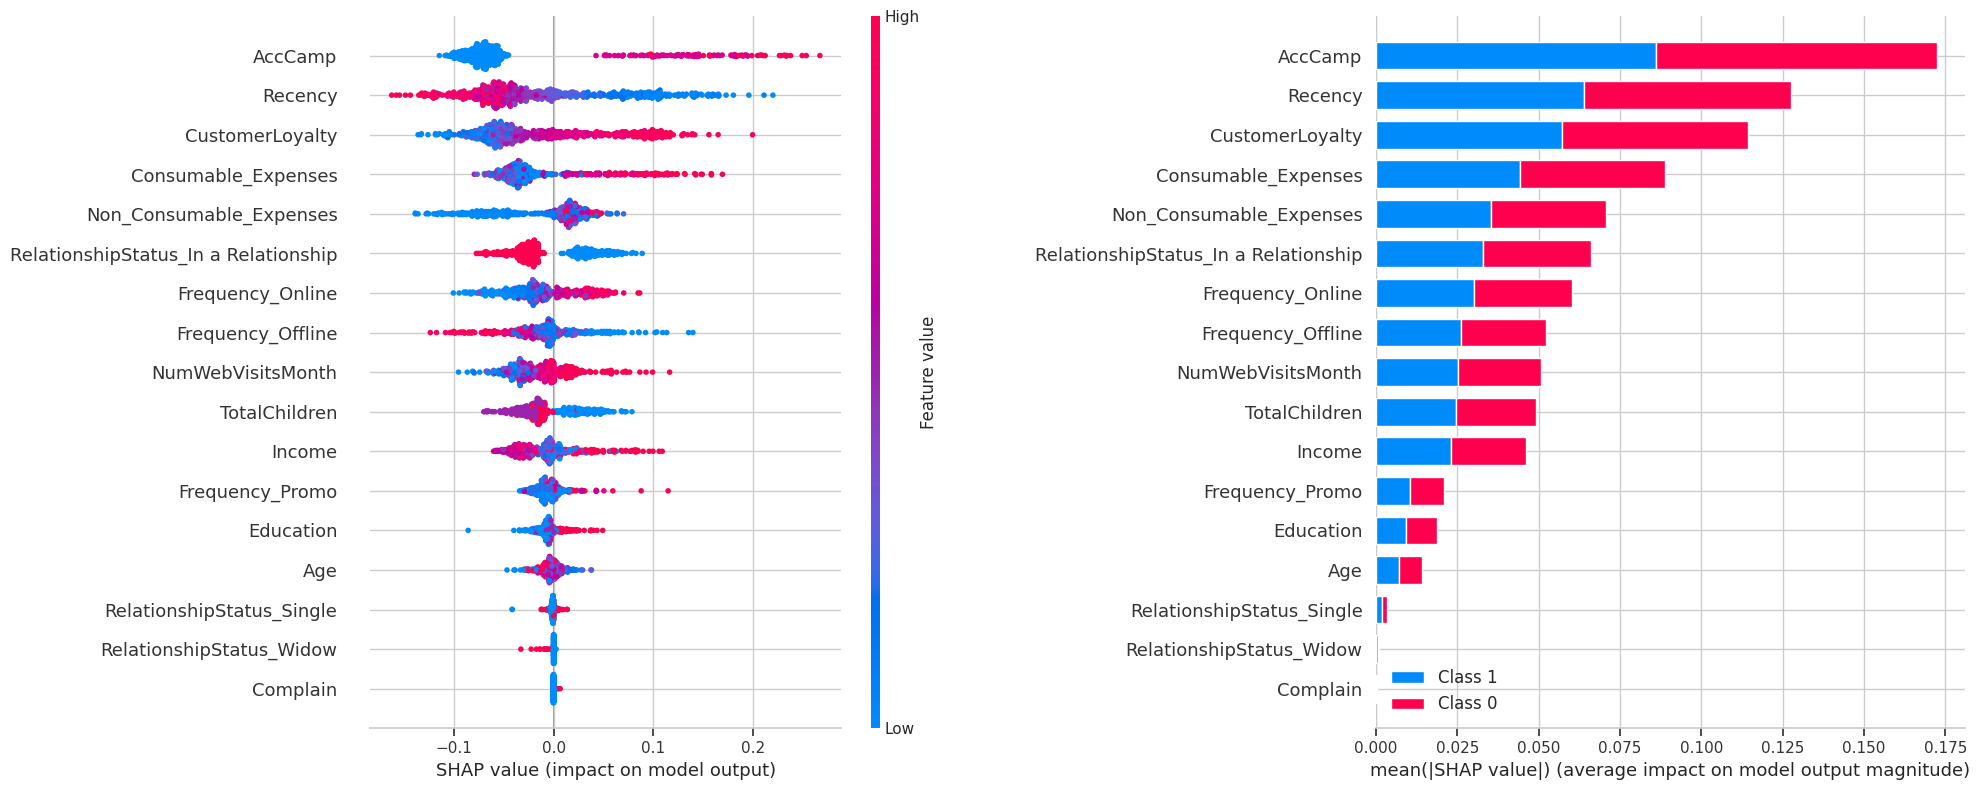

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_test)

fig = plt.figure()
ax0 = fig.add_subplot(121)
shap.summary_plot(shap_values[1], X_test, show = False)
ax1 = fig.add_subplot(122)
shap.summary_plot(shap_values, X_test, plot_type='bar', show = False)
plt.gcf().set_size_inches(20,8)
plt.tight_layout()
plt.show()

Adapun tiga feature teratas yang memengaruhi keputusan customer untuk meresponse customer.
1. Accepted Campaign yaitu jumlah campaign yang diresponse customer. Dimana semakin sering customer meresponse campaign sebelumnya, maka customer akan cenderung meresponse campaign
2. Recency, yaitu jumlah hari dari pembelian terakhir. Dimana semakin tinggi nilai recency maka customer akan cenderung tidak meresponse campaign.
3. Customer loyalty yaitu sudah berapa lama customer menjadi member, dimana customer yang sudah lama bergabung sebagai member akan lebih cenderung meresponse campaign.

## RFM Analysis

In [ ]:
# RFM Analysis

df['Frequency']= df[['Frequency_Online', 'Frequency_Offline', 'Frequency_Promo']].sum(axis=1)
df['Monetary']= df[['Consumable_Expenses', 'Non_Consumable_Expenses']].sum(axis=1)

In [ ]:
# Add segment values to RFM table using q-quantiles
# Recency : number of days since last purchase
# Frequency : Total number of purchase
# Monetary : Total money customer spent
# So, Customers with the lowest recency, highest frequency and monetary amounts considered as top customers

df['r_terciles'] = pd.qcut(df['Recency'], 3, ['1','2','3'])
df['f_terciles'] = pd.qcut(df['Frequency'], 3, ['3','2','1'])
df['m_terciles'] = pd.qcut(df['Monetary'], 3, ['3','2','1'])

In [ ]:
# RFM Result Interpretation

df['RFM_Score'] = df.r_terciles.astype(str)+ df.f_terciles.astype(str) + df.m_terciles.astype(str)

In [ ]:
df.loc[df['RFM_Score']== '111', 'RFM_Segment'] = 'Champions'
df.loc[df['RFM_Score'].isin(['112','121','113','122','131']), 'RFM_Segment'] = 'Loyal Customers'
df.loc[df['RFM_Score'].isin(['133','123','132']), 'RFM_Segment'] = 'Recent Customers'
df.loc[df['RFM_Score'].isin(['211','212','213','221','231']), 'RFM_Segment'] = 'Potential Loyalist'
df.loc[df['RFM_Score']== '222', 'RFM_Segment'] = 'Customers Needing Attention'
df.loc[df['RFM_Score'].isin(['311','321','312','322','313','331']), 'RFM_Segment'] = 'Can’t Lose Them'
df.loc[df['RFM_Score'].isin(['232','223']), 'RFM_Segment'] = 'About to Sleep'
df.loc[df['RFM_Score']== '233', 'RFM_Segment'] = 'At Risk'
df.loc[df['RFM_Score'].isin(['333','332','323']), 'RFM_Segment'] = 'Lost'

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,RelationshipStatus_In a Relationship,RelationshipStatus_Single,RelationshipStatus_Widow,Frequency,Monetary,r_terciles,f_terciles,m_terciles,RFM_Score,RFM_Segment
0,5524,1957,1,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,0,25,1617,2,1,1,211,Potential Loyalist
1,2174,1954,1,Single,46344.0,1,1,2014-03-08,38,11,...,0,1,0,6,27,2,3,3,233,At Risk
2,4141,1965,1,Together,71613.0,0,0,2013-08-21,26,426,...,1,0,0,21,776,1,1,2,112,Loyal Customers
3,6182,1984,1,Together,26646.0,1,0,2014-02-10,26,11,...,1,0,0,8,53,1,3,3,133,Recent Customers
4,5324,1981,3,Married,58293.0,1,0,2014-01-19,94,173,...,1,0,0,19,422,3,2,2,322,Can’t Lose Them


In [ ]:
rfm=df.groupby('RFM_Segment').agg({'ID' : 'nunique'}).reset_index()
rfm=rfm.sort_values(by='ID', ascending=False)

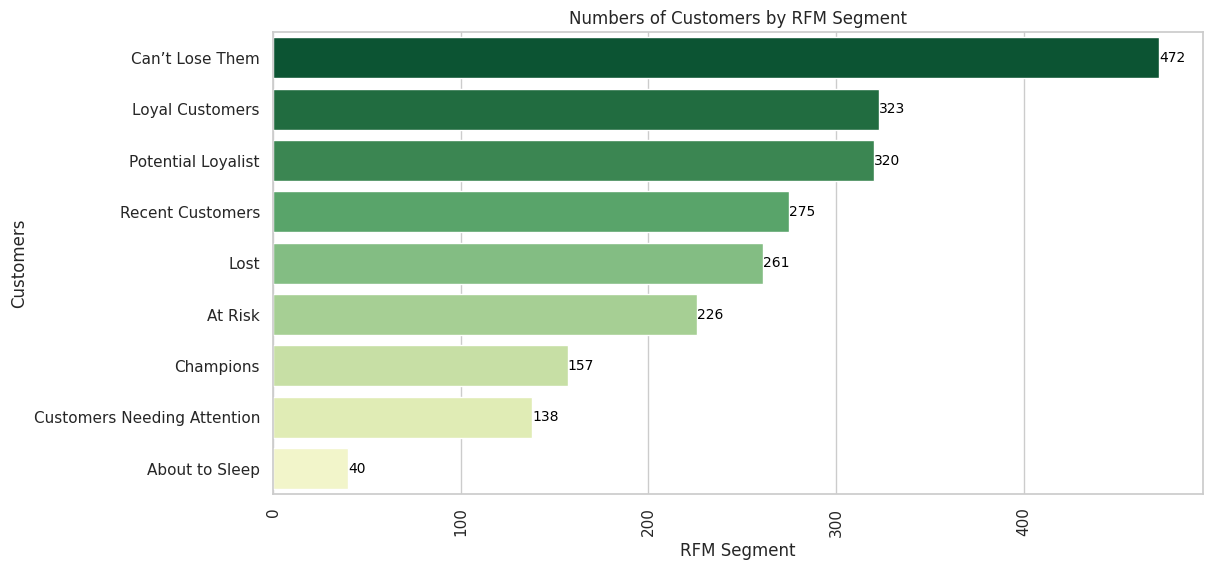

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=rfm['ID'], y=rfm['RFM_Segment'], palette='YlGn_r', orient='h')

for i, v in enumerate(rfm['ID']):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)
plt.xlabel('RFM Segment')
plt.ylabel('Customers')
plt.title('Numbers of Customers by RFM Segment')

# Show the plot
plt.show()